## Import Libraries and Layers

In [1]:
import arcgis
print(arcgis.__version__)

import arcpy
print(arcpy.GetInstallInfo())

1.6.2
{'LicenseLevel': 'Advanced', 'InstallDir': 'c:\\users\\mohi9282\\appdata\\local\\programs\\arcgis\\pro\\', 'Installer': 'mohi9282', 'ProductName': 'ArcGISPro', 'Version': '2.4', 'SourceDir': 'C:\\Users\\mohi9282\\AppData\\Local\\Microsoft\\Windows\\INetCache\\ArcGISUpdate\\ArcGISPro\\esrisoftware.esri.com\\', 'InstallType': 'N/A', 'BuildNumber': '19948', 'InstallDate': '6/28/2019', 'InstallTime': '11:57:42', 'SPNumber': 'N/A', 'SPBuild': 'N/A'}


In [2]:
from IPython.display import display
import arcgis
from arcgis.gis import GIS
import pandas as pd
pd.set_option('display.max_columns', 500)
from arcgis.features import FeatureLayer
from arcgis.mapping import WebMap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

AttributeError: module 'numpy' has no attribute '__version__'

In [2]:
gis = GIS("https://datascienceqa.esri.com/portal", "portaladmin", "esri.agp", verify_cert=False)
# gis = GIS("https://datascienceqa.esri.com/portal", "portaladmin", "esri.agp")

In [13]:
# Layers Used
# Provider data layer
provider_layer = FeatureLayer("https://datascienceqa.esri.com/server/rest/services/Hosted/provider_clean_data_geocoded_6_19/FeatureServer/0")

# Population Density
from arcgis.mapping import MapImageLayer
popdensity = MapImageLayer("https://datascienceqa.esri.com/portal/sharing/servers/ab4e1996d588405d9cd68348ef660f70/rest/services/USA_Demographics_and_Boundaries_2018/MapServer")

# Median Income
medIncome = MapImageLayer("https://datascienceqa.esri.com/portal/sharing/servers/3e5f8ebe5a114a61b7f350e7a1203761/rest/services/USA_Demographics_and_Boundaries_2018/MapServer")

# Median Age
medAge = MapImageLayer("https://datascienceqa.esri.com/portal/sharing/servers/e2558ac0c5e04235ad7820773e89d110/rest/services/USA_Demographics_and_Boundaries_2018/MapServer")

# Health Insurance Coverage
tx_insurance_state = FeatureLayer("https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/ACS_Health_Insurance_Boundaries/FeatureServer")
tx_insurance_county = FeatureLayer("https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/ACS_Health_Insurance_Boundaries/FeatureServer/1")
tx_insurance_tract = FeatureLayer("https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/ACS_Health_Insurance_Boundaries/FeatureServer/2")

# Fertility layers for State, County and Tract (Percent of women 15 to 50 who had a birth in the past 12 months)
fertility_state = FeatureLayer("https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/ACS_Fertility_by_Age_Boundaries/FeatureServer/0")
fertility_county = FeatureLayer("https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/ACS_Fertility_by_Age_Boundaries/FeatureServer/1")
fertility_tract = FeatureLayer("https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/ACS_Fertility_by_Age_Boundaries/FeatureServer/2")

AttributeError: 'MapImageLayer' object has no attribute '_lazy_properties'

In [3]:
search_result = gis.content.search('title: provider_data_geocoded_7_30','Feature Layer')
provider_data_item = search_result[0]
provider_data_item

<Item title:"provider_data_geocoded_7_30_CA" type:Feature Layer Collection owner:portaladmin>

In [4]:
provider_data_layer = provider_data_item.layers[0]
provider_data_layer

<FeatureLayer url:"https://datascienceqa.esri.com/server/rest/services/Hosted/provider_data_geocoded_7_30_CA/FeatureServer/0">

## OBGYN Providers and Other Data

#### Create df for OBGYN providers

In [9]:
# Get provider data for obgyn providers only

obgyn_featureset = provider_data_layer.query(where="user_taxonomy_code_1 in ('207V00000X','207VC0200X','207VF0040X','207VX0201X','207VG0400X','207VH0002X','207VM0101X','207VB0002X','207VX0000X','207VE0102X','363LX0001X','163WR1000X','163WW0101X','282NW0100X')", out_fields='x,y,user_npi,user_entity_type,user_provider_gender,user_taxonomy_code_1,user_full_address,postal,city,subregion,region,regionabbr')
obgyn_df = obgyn_featureset.sdf
obgyn_df.head()

SHAPE        city  objectid  \
0  {"x": -97.49116252599998, "y": 35.261905469000...      Norman         8   
1  {"x": -120.00990533799995, "y": 46.31641132900...   Sunnyside        24   
2  {"x": -81.63739261199999, "y": 38.359802984000...  Charleston        26   
3  {"x": -81.63739261199999, "y": 38.359802984000...  Charleston        99   
4  {"x": -81.63739261199999, "y": 38.359802984000...  Charleston       172   

  postal         region regionabbr         subregion user_entity_type  \
0  73072       Oklahoma         OK  Cleveland County       Individual   
1  98944     Washington         WA     Yakima County       Individual   
2  25302  West Virginia         WV    Kanawha County       Individual   
3  25302  West Virginia         WV    Kanawha County       Individual   
4  25302  West Virginia         WV    Kanawha County       Individual   

                                   user_full_address      user_npi  \
0  3400 W TECUMSEH RD, SUITE 205, NORMAN, OK 7307...  1.487658e+09   
1       803 E LINCOLN AVE, , SUNNYSIDE, WA 989442383  1.265435e+09   
2  830 PENNSYLVANIA AVE, SUITE 108, CHARLESTON, W...  1.447253e+09   
3  830 PENNSYLVANIA AVE, STE 402, CHARLESTON, WV ...  1.487658e+09   
4  830 PENNSYLVANIA AVE, STE 402, CHARLESTON, WV ...  1.255334e+09   

  user_provider_gender user_taxonomy_code_1           x          y  
0                    F           207V00000X  -97.491163  35.261905  
1                    F           207V00000X -120.009905  46.316411  
2                    M           207V00000X  -81.637393  38.359803  
3                    M           207V00000X  -81.637393  38.359803  
4                    M           207V00000X  -81.637393  38.359803

In [10]:
obgyn_df.shape

(67638, 14)

In [10]:
# Create csv of data
obgyn_df.to_csv('obgyn_df.csv', index=None, header=True)

In [11]:
obgyn_county_df = obgyn_df[['regionabbr','subregion']]
obgyn_county_df['Provider_Count'] = obgyn_county_df.groupby(['regionabbr','subregion'])['subregion'].transform('count')
obgyn_count_df = obgyn_county_df.drop_duplicates(subset='subregion', keep="first", inplace=True)
obgyn_county_df.shape

C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(1282, 3)

In [12]:
obgyn_county_df = obgyn_county_df.sort_values(by=['Provider_Count'], ascending=False)
obgyn_county_df.head()

regionabbr           subregion  Provider_Count
100          CA  Los Angeles County            2094
37           IL         Cook County            1586
1167         NY     New York County            1136
9            TX       Harris County            1124
134          AZ     Maricopa County             844

In [13]:
# Check missing
obgyn_county_df.isnull().sum()

regionabbr        0
subregion         0
Provider_Count    0
dtype: int64

#### Create County df from Demographics Data

In [14]:
# Search for Population data layer
popsearch_result = gis.content.search('title: 2018 USA Population Density')
popsearch_result

[<Item title:"2018 USA Tapestry Segmentation" type:Map Image Layer owner:esri_livingatlas>,
 <Item title:"2018 USA Population Density" type:Map Image Layer owner:esri_livingatlas>]

<Item title:"2018 USA Population Density" type:Map Image Layer owner:esri_livingatlas>
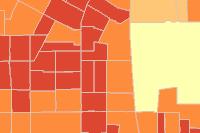

In [15]:
# Get Population Density
popdensity = popsearch_result[1]
popdensity

In [17]:
# Check all layers in population Density
popdensity.layers

[<FeatureLayer url:"https://datascienceqa.esri.com/portal/sharing/servers/ab4e1996d588405d9cd68348ef660f70/rest/services/USA_Demographics_and_Boundaries_2018/MapServer/0">,
 <FeatureLayer url:"https://datascienceqa.esri.com/portal/sharing/servers/ab4e1996d588405d9cd68348ef660f70/rest/services/USA_Demographics_and_Boundaries_2018/MapServer/1">,
 <FeatureLayer url:"https://datascienceqa.esri.com/portal/sharing/servers/ab4e1996d588405d9cd68348ef660f70/rest/services/USA_Demographics_and_Boundaries_2018/MapServer/2">,
 <FeatureLayer url:"https://datascienceqa.esri.com/portal/sharing/servers/ab4e1996d588405d9cd68348ef660f70/rest/services/USA_Demographics_and_Boundaries_2018/MapServer/3">,
 <FeatureLayer url:"https://datascienceqa.esri.com/portal/sharing/servers/ab4e1996d588405d9cd68348ef660f70/rest/services/USA_Demographics_and_Boundaries_2018/MapServer/4">,
 <FeatureLayer url:"https://datascienceqa.esri.com/portal/sharing/servers/ab4e1996d588405d9cd68348ef660f70/rest/services/USA_Demographi

In [19]:
# county_layer = FeatureLayer("https://datascienceqa.esri.com/portal/sharing/servers/3e5f8ebe5a114a61b7f350e7a1203761/rest/services/USA_Demographics_and_Boundaries_2018/MapServer/46")
county_layer = popdensity.layers[46]
county_df = pd.DataFrame()
offset = 0
while offset <= 3000:
    county_featureset_test = county_layer.query(return_all_records=False,
                                           result_offset=offset,
                                           result_record_count=750)
    county_df_test = county_featureset_test.sdf
    county_df = pd.concat([county_df_test, county_df], ignore_index=True)
    offset += 750

In [20]:
county_df.shape

(3142, 1943)

In [38]:
# Create csv of data
county_df.to_csv('county_df.csv', index=None, header=True)

In [22]:
for field in county_layer.properties.fields:
#     print(field)
    print(field['name'], '\t', field['alias'])
#     print(field[0])

OBJECTID 	 OBJECTID
Shape 	 Shape
ID 	 ID
NAME 	 NAME
STATE_NAME 	 STATE_NAME
ST_ABBREV 	 ST_ABBREV
AREA 	 Area in Square Miles (Calculated)
TOTPOP_CY 	 2018 Total Population (Esri)
HHPOP_CY 	 2018 Household Population (Esri)
FAMPOP_CY 	 2018 Family Population (Esri)
GQPOP_CY 	 2018 Group Quarters Population (Esri)
POPDENS_CY 	 2018 Population Density (Pop per Square Mile) (Esri)
TOTHH_CY 	 2018 Total Households (Esri)
AVGHHSZ_CY 	 2018 Average Household Size (Esri)
FAMHH_CY 	 2018 Total Family Households (Esri)
AVGFMSZ_CY 	 2018 Average Family Size (Esri)
TOTHU_CY 	 2018 Total Housing Units (Esri)
OWNER_CY 	 2018 Owner Occupied Housing Units (Esri)
RENTER_CY 	 2018 Renter Occupied Housing Units (Esri)
VACANT_CY 	 2018 Vacant Housing Units (Esri)
POPGRW10CY 	 2010-2018 Population: Annual Growth Rate (Esri)
HHGRW10CY 	 2010-2018 Households: Annual Growth Rate (Esri)
FAMGRW10CY 	 2010-2018 Families: Annual Growth Rate (Esri)
GENALPHACY 	 2018 Generation Alpha Population (Born 2017 or Lat

FAGE38_FY 	 2023 Female Population Age 38 (Esri)
FAGE39_FY 	 2023 Female Population Age 39 (Esri)
FAGE40_FY 	 2023 Female Population Age 40 (Esri)
FAGE41_FY 	 2023 Female Population Age 41 (Esri)
FAGE42_FY 	 2023 Female Population Age 42 (Esri)
FAGE43_FY 	 2023 Female Population Age 43 (Esri)
FAGE44_FY 	 2023 Female Population Age 44 (Esri)
FAGE45_FY 	 2023 Female Population Age 45 (Esri)
FAGE46_FY 	 2023 Female Population Age 46 (Esri)
FAGE47_FY 	 2023 Female Population Age 47 (Esri)
FAGE48_FY 	 2023 Female Population Age 48 (Esri)
FAGE49_FY 	 2023 Female Population Age 49 (Esri)
FAGE50_FY 	 2023 Female Population Age 50 (Esri)
FAGE51_FY 	 2023 Female Population Age 51 (Esri)
FAGE52_FY 	 2023 Female Population Age 52 (Esri)
FAGE53_FY 	 2023 Female Population Age 53 (Esri)
FAGE54_FY 	 2023 Female Population Age 54 (Esri)
FAGE55_FY 	 2023 Female Population Age 55 (Esri)
FAGE56_FY 	 2023 Female Population Age 56 (Esri)
FAGE57_FY 	 2023 Female Population Age 57 (Esri)
FAGE58_FY 	 2023 Fem

In [147]:
# Keeping specific columns
county_df_new = county_df[['ST_ABBREV','NAME','ASIAN_CY','AMERIND_CY','AVGHHSZ_CY','AVGHINC_CY','BLACK_CY','EDUCBASECY','HISPPOP_CY',
                          'MEDAGE_CY','MINORITYCY','OTHRACE_CY','PCI_CY','POPDENS_CY','UNEMPRT_CY','WHITE_CY','SMCOLL_CY',
                          'ASSCDEG_CY','BACHDEG_CY','GRADDEG_CY']]
county_df_new.head()

ST_ABBREV               NAME  ASIAN_CY  AMERIND_CY  AVGHHSZ_CY  AVGHINC_CY  \
0        WV   Doddridge County        33          26        2.42       51537   
1        WV     Fayette County       101         112        2.37       50170   
2        WV      Gilmer County        51          53        2.35       50297   
3        WV       Grant County        26          19        2.40       52611   
4        WV  Greenbrier County       196         137        2.27       55885   

   BLACK_CY  EDUCBASECY  HISPPOP_CY  MEDAGE_CY  MINORITYCY  OTHRACE_CY  \
0       201        6405          91       43.2         467           5   
1      2000       33677         540       44.7        3456         106   
2      1044        6106         479       39.0        1720         209   
3       118        9296         171       46.9         453          82   
4      1078       27410         590       46.8        2669         184   

   PCI_CY  POPDENS_CY  UNEMPRT_CY  WHITE_CY  SMCOLL_CY  ASSCDEG_CY  \
0   20870        27.7         5.8      8454       1048         363   
1   20953        69.2         4.7     42649       5473        2901   
2   20296        24.5         7.6      6772       1272         336   
3   21869        26.2         3.8     12092       1270         731   
4   24505        36.0         1.0     34375       4667        1810   

   BACHDEG_CY  GRADDEG_CY  
0         695         368  
1        3215        1731  
2         632         460  
3         804         655  
4        3689        2274

#### Remove Unnecessary columns

In [23]:
# Removing columns for 2023,2010,2000
county_df = county_df.loc[:,~county_df.columns.str.contains('FY|10|00')]
len(county_df.columns)

894

In [24]:
# Removing columns for individual age
county_df = county_df.loc[:,~county_df.columns.str.startswith(('AGE','MAGE','FAGE'))]
len(county_df.columns)

640

In [25]:
# Removing columns for Industry, Occupation
county_df = county_df.loc[:,~county_df.columns.str.startswith(('IND','OCC'))]
len(county_df.columns)

596

In [26]:
# Removing Individual Income Columns
county_df = county_df.loc[:,~county_df.columns.str.contains('A15|A25|A35|A45|A55|A65|A75')]
len(county_df.columns)

366

In [27]:
# Removing columns for Disposable Income and Net Worth
county_df = county_df.loc[:,~county_df.columns.str.startswith(('DI','NW'))]
len(county_df.columns)

348

In [28]:
# Removing columns for Tapestry Segmentation
county_df = county_df.loc[:,~county_df.columns.str.startswith(('TSE','THH','TADULT'))]
len(county_df.columns)

190

In [29]:
# Removing columns for Home Value
county_df = county_df.loc[:,~county_df.columns.str.startswith(('VAL'))]
len(county_df.columns)

181

In [30]:
county_df.columns

Index(['AAGEBASECY', 'AGGDI_CY', 'AGGHINC_CY', 'AGGINC_CY', 'AGGNW_CY',
       'AIFBASE_CY', 'AIMBASE_CY', 'AMERIND_CY', 'AREA', 'ASIAN_CY',
       ...
       'TOTHU_CY', 'TOTPOP_CY', 'UNEMPRT_CY', 'UNEMP_CY', 'VACANT_CY',
       'WAGEBASECY', 'WHITE_CY', 'WHTFBASECY', 'WHTMBASECY', 'WIDOWED_CY'],
      dtype='object', length=181)

In [31]:
print(obgyn_county_df.shape)
print(county_df.shape)

(1282, 3)
(3142, 181)


#### Create County df from Expenditure Data

In [5]:
# Search for Population data layer
expsearch_result = gis.content.search('title: 2018 USA Health Insurance Spending')
expsearch_result

[<Item title:"2018 USA High Credit Card Expenditures" type:Map Image Layer owner:esri_livingatlas>,
 <Item title:"2018 USA Health Insurance Spending" type:Map Image Layer owner:esri_livingatlas>]

<Item title:"2018 USA Health Insurance Spending" type:Map Image Layer owner:esri_livingatlas>
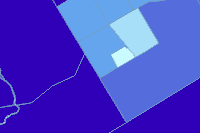

In [6]:
# Get Healthcare expenditure data
health_exp = expsearch_result[1]
health_exp

In [28]:
# Check all layers in population Density
health_exp.layers

[<FeatureLayer url:"https://datascienceqa.esri.com/portal/sharing/servers/3fe029d089124e5dab518fd2c4f7eabe/rest/services/USA_Consumer_Expenditures_2018/MapServer/0">,
 <FeatureLayer url:"https://datascienceqa.esri.com/portal/sharing/servers/3fe029d089124e5dab518fd2c4f7eabe/rest/services/USA_Consumer_Expenditures_2018/MapServer/1">,
 <FeatureLayer url:"https://datascienceqa.esri.com/portal/sharing/servers/3fe029d089124e5dab518fd2c4f7eabe/rest/services/USA_Consumer_Expenditures_2018/MapServer/2">,
 <FeatureLayer url:"https://datascienceqa.esri.com/portal/sharing/servers/3fe029d089124e5dab518fd2c4f7eabe/rest/services/USA_Consumer_Expenditures_2018/MapServer/3">,
 <FeatureLayer url:"https://datascienceqa.esri.com/portal/sharing/servers/3fe029d089124e5dab518fd2c4f7eabe/rest/services/USA_Consumer_Expenditures_2018/MapServer/4">,
 <FeatureLayer url:"https://datascienceqa.esri.com/portal/sharing/servers/3fe029d089124e5dab518fd2c4f7eabe/rest/services/USA_Consumer_Expenditures_2018/MapServer/5">

In [30]:
# Look at the fields and their data types
health_exp_county_layer = health_exp.layers[46]
for f in health_exp_county_layer.properties.fields:
    print(f['name'],'      ',f['alias'])

OBJECTID        OBJECTID
Shape        Shape
ID        ID
NAME        NAME
STATE_NAME        STATE_NAME
ST_ABBREV        ST_ABBREV
AREA        Area in Square Miles (Calculated)
X2001_X        2018 Alcoholic Beverages
X2001_A        2018 Alcoholic Beverages: Average
X2001_I        2018 Alcoholic Beverages: Index
X2002_X        2018 Alcoholic Beverages at Home
X2002_A        2018 Alcoholic Beverages at Home: Average
X2002_I        2018 Alcoholic Beverages at Home: Index
X2003_X        2018 Alcoholic Beverages at Home - Beer & Ale
X2003_A        2018 Alcoholic Beverages at Home - Beer & Ale: Average
X2003_I        2018 Alcoholic Beverages at Home - Beer & Ale: Index
X2004_X        2018 Alcoholic Beverages at Home - Whiskey
X2004_A        2018 Alcoholic Beverages at Home - Whiskey: Average
X2004_I        2018 Alcoholic Beverages at Home - Whiskey: Index
X2005_X        2018 Alcoholic Beverages at Home - Wine
X2005_A        2018 Alcoholic Beverages at Home - Wine: Average
X2005_I        2018 

X1129_A        2018 Food at Home - Bottled Water: Average
X1129_I        2018 Food at Home - Bottled Water: Index
X1090_X        2018 Food at Home - Snacks/Other Food
X1090_A        2018 Food at Home - Snacks/Other Food: Average
X1090_I        2018 Food at Home - Snacks/Other Food: Index
X1091_X        2018 Food at Home - Sugar & Other Sweets
X1091_A        2018 Food at Home - Sugar & Other Sweets: Average
X1091_I        2018 Food at Home - Sugar & Other Sweets: Index
X1092_X        2018 Food at Home - Candy & Chewing Gum
X1092_A        2018 Food at Home - Candy & Chewing Gum: Average
X1092_I        2018 Food at Home - Candy & Chewing Gum: Index
X1093_X        2018 Food at Home - Sugar
X1093_A        2018 Food at Home - Sugar: Average
X1093_I        2018 Food at Home - Sugar: Index
X1094_X        2018 Food at Home - Artificial Sweeteners
X1094_A        2018 Food at Home - Artificial Sweeteners: Average
X1094_I        2018 Food at Home - Artificial Sweeteners: Index
X1095_X        2018 

X6052_I        2018 Driver`s License Fees: Index
X6053_X        2018 Vehicle Inspection Fees
X6053_A        2018 Vehicle Inspection Fees: Average
X6053_I        2018 Vehicle Inspection Fees: Index
X6054_X        2018 Parking Fees & Tolls excluding Trips
X6054_A        2018 Parking Fees & Tolls excluding Trips: Average
X6054_I        2018 Parking Fees & Tolls excluding Trips: Index
X6055_X        2018 Parking Fees excluding Residence (Not on Trips)
X6055_A        2018 Parking Fees excluding Residence (Not on Trips): Average
X6055_I        2018 Parking Fees excluding Residence (Not on Trips): Index
X6056_X        2018 Tolls/Electronic Toll Passes excluding Trips
X6056_A        2018 Tolls/Electronic Toll Passes excluding Trips: Average
X6056_I        2018 Tolls/Electronic Toll Passes excluding Trips: Index
X6057_X        2018 Towing Charges
X6057_A        2018 Towing Charges: Average
X6057_I        2018 Towing Charges: Index
X6068_X        2018 Auto Service Clubs & GPS Services
X6068_A   

In [36]:
# county_layer = FeatureLayer("https://datascienceqa.esri.com/portal/sharing/servers/3e5f8ebe5a114a61b7f350e7a1203761/rest/services/USA_Demographics_and_Boundaries_2018/MapServer/46")
health_exp_county_layer = health_exp.layers[46]
# health_exp_county_featureset = health_exp_county_layer.query(outfields='X8001_A,X8002_A,X8013_A')
# health_exp_county_df = health_exp_county_featureset.sdf
# health_exp_county_df.head()

health_exp_county_df = pd.DataFrame()
offset = 0
while offset <= 3000:
    health_exp_county_featureset = health_exp_county_layer.query(return_all_records=False,result_offset=offset,result_record_count=150)
    county_df_test = health_exp_county_featureset.sdf
    health_exp_county_df = pd.concat([county_df_test, health_exp_county_df], ignore_index=True)
    offset += 150

In [37]:
health_exp_county_df.shape

(3142, 2180)

In [39]:
health_exp_county_df.to_csv('health_exp_county_df.csv', index=None, header=True)

In [44]:
# Keeping specific columns
health_exp_new = health_exp_county_df[['ST_ABBREV','NAME','X8001_A','X8002_A','X8013_A','X8018_A','X8019_A','X8024_A','X8032_A','X13002_A','X13004_A']]
health_exp_new.head()

ST_ABBREV               NAME  X8001_A  X8002_A  X8013_A  X8018_A  X8019_A  \
0        WV   Doddridge County  4466.09  2894.59   632.30  1571.51   794.24   
1        WV     Fayette County  4258.47  2763.71   592.84  1494.76   759.18   
2        WV      Gilmer County  4182.28  2716.19   579.07  1466.09   745.24   
3        WV       Grant County  4382.40  2848.84   596.32  1533.57   784.03   
4        WV  Greenbrier County  4548.73  2959.83   618.61  1588.90   816.44   

   X8024_A  X8032_A  X13002_A  X13004_A  
0    52.65   132.74    270.40   4548.75  
1    49.59   124.51    257.88   4436.31  
2    47.76   122.37    248.70   4427.67  
3    50.31   125.52    272.29   4723.08  
4    50.80   130.12    280.79   4990.78

#### Merge dataframes

In [148]:
# Merge provider count and demographic data at county level
obgyn_demo_df = pd.merge(obgyn_county_df,county_df_new,left_on=['regionabbr','subregion'], right_on=['ST_ABBREV','NAME'],how='left')

# Merge provider count and women_df at state level
newcounty_obgyn_df = pd.merge(obgyn_demo_df,health_exp_new,left_on=['regionabbr','subregion'], right_on=['ST_ABBREV','NAME'],how='left')

In [149]:
newcounty_obgyn_df.shape

(1282, 34)

In [150]:
# Drop duplicate columns
newcounty_obgyn_df.drop(['ST_ABBREV_x','NAME_x','ST_ABBREV_y','NAME_y'], axis=1, inplace=True)

In [151]:
newcounty_obgyn_df.head()

regionabbr           subregion  Provider_Count   ASIAN_CY  AMERIND_CY  \
0         CA  Los Angeles County            2094  1517296.0     73559.0   
1         IL         Cook County            1586   395712.0     21113.0   
2         NY     New York County            1136   212844.0      8756.0   
3         TX       Harris County            1124   341640.0     30001.0   
4         AZ     Maricopa County             844   184150.0     98584.0   

   AVGHHSZ_CY  AVGHINC_CY   BLACK_CY  EDUCBASECY  HISPPOP_CY  MEDAGE_CY  \
0        3.00     94861.0   850350.0   6899087.0   5043293.0       35.7   
1        2.58     88254.0  1233716.0   3607345.0   1374256.0       36.6   
2        2.00    136860.0   247085.0   1251653.0    441304.0       37.9   
3        2.85     89252.0   901459.0   3029538.0   2035551.0       33.5   
4        2.69     83005.0   253576.0   2891837.0   1373153.0       35.8   

   MINORITYCY  OTHRACE_CY   PCI_CY  POPDENS_CY  UNEMPRT_CY   WHITE_CY  \
0   7644196.0   2305030.0  31563.0      2535.5         4.5  5019340.0   
1   3078944.0    608672.0  34083.0      5579.2         6.9  2859209.0   
2    899778.0    193191.0  66805.0     72736.2         3.9   924396.0   
3   3339578.0    712410.0  31405.0      2780.1         5.9  2573473.0   
4   1981147.0    598035.0  30701.0       476.9         5.3  3066684.0   

   SMCOLL_CY  ASSCDEG_CY  BACHDEG_CY  GRADDEG_CY  X8001_A  X8002_A  X8013_A  \
0  1300786.0    469649.0   1445895.0    782758.0  5905.52  3907.44   579.43   
1   690225.0    237028.0    830433.0    552050.0  5692.87  3774.06   585.60   
2   121070.0     48360.0    406878.0    371255.0  8035.56  5382.10   796.17   
3   606842.0    193511.0    605813.0    345886.0  5800.32  3840.81   564.48   
4   711033.0    241714.0    597653.0    342159.0  5574.19  3675.76   581.95   

   X8018_A  X8019_A  X8024_A  X8032_A  X13002_A  X13004_A  
0  1998.08  1132.94    59.76   118.60    399.93   9046.16  
1  1918.81  1061.74    56.05   122.50    381.05   8356.49  
2  2653.46  1464.96    69.80   167.61    530.01  12793.70  
3  1959.50  1087.37    60.64   119.69    374.86   8547.08  
4  1898.43  1041.69    57.84   123.67    362.02   7908.62

In [152]:
newcounty_obgyn_df.to_csv('newcounty_obgyn_df.csv',index=None,header=True)

In [7]:
# Read from csv
newcounty_obgyn_df = pd.read_csv('newcounty_obgyn_df.csv')
newcounty_obgyn_df.head()

regionabbr           subregion  Provider_Count   ASIAN_CY  AMERIND_CY  \
0         CA  Los Angeles County            2094  1517296.0     73559.0   
1         IL         Cook County            1586   395712.0     21113.0   
2         NY     New York County            1136   212844.0      8756.0   
3         TX       Harris County            1124   341640.0     30001.0   
4         AZ     Maricopa County             844   184150.0     98584.0   

   AVGHHSZ_CY  AVGHINC_CY   BLACK_CY  EDUCBASECY  HISPPOP_CY  MEDAGE_CY  \
0        3.00     94861.0   850350.0   6899087.0   5043293.0       35.7   
1        2.58     88254.0  1233716.0   3607345.0   1374256.0       36.6   
2        2.00    136860.0   247085.0   1251653.0    441304.0       37.9   
3        2.85     89252.0   901459.0   3029538.0   2035551.0       33.5   
4        2.69     83005.0   253576.0   2891837.0   1373153.0       35.8   

   MINORITYCY  OTHRACE_CY   PCI_CY  POPDENS_CY  UNEMPRT_CY   WHITE_CY  \
0   7644196.0   2305030.0  31563.0      2535.5         4.5  5019340.0   
1   3078944.0    608672.0  34083.0      5579.2         6.9  2859209.0   
2    899778.0    193191.0  66805.0     72736.2         3.9   924396.0   
3   3339578.0    712410.0  31405.0      2780.1         5.9  2573473.0   
4   1981147.0    598035.0  30701.0       476.9         5.3  3066684.0   

   SMCOLL_CY  ASSCDEG_CY  BACHDEG_CY  GRADDEG_CY  X8001_A  X8002_A  X8013_A  \
0  1300786.0    469649.0   1445895.0    782758.0  5905.52  3907.44   579.43   
1   690225.0    237028.0    830433.0    552050.0  5692.87  3774.06   585.60   
2   121070.0     48360.0    406878.0    371255.0  8035.56  5382.10   796.17   
3   606842.0    193511.0    605813.0    345886.0  5800.32  3840.81   564.48   
4   711033.0    241714.0    597653.0    342159.0  5574.19  3675.76   581.95   

   X8018_A  X8019_A  X8024_A  X8032_A  X13002_A  X13004_A  
0  1998.08  1132.94    59.76   118.60    399.93   9046.16  
1  1918.81  1061.74    56.05   122.50    381.05   8356.49  
2  2653.46  1464.96    69.80   167.61    530.01  12793.70  
3  1959.50  1087.37    60.64   119.69    374.86   8547.08  
4  1898.43  1041.69    57.84   123.67    362.02   7908.62

In [8]:
test_newcounty_df = newcounty_obgyn_df.copy()
test_newcounty_df.head()

regionabbr           subregion  Provider_Count   ASIAN_CY  AMERIND_CY  \
0         CA  Los Angeles County            2094  1517296.0     73559.0   
1         IL         Cook County            1586   395712.0     21113.0   
2         NY     New York County            1136   212844.0      8756.0   
3         TX       Harris County            1124   341640.0     30001.0   
4         AZ     Maricopa County             844   184150.0     98584.0   

   AVGHHSZ_CY  AVGHINC_CY   BLACK_CY  EDUCBASECY  HISPPOP_CY  MEDAGE_CY  \
0        3.00     94861.0   850350.0   6899087.0   5043293.0       35.7   
1        2.58     88254.0  1233716.0   3607345.0   1374256.0       36.6   
2        2.00    136860.0   247085.0   1251653.0    441304.0       37.9   
3        2.85     89252.0   901459.0   3029538.0   2035551.0       33.5   
4        2.69     83005.0   253576.0   2891837.0   1373153.0       35.8   

   MINORITYCY  OTHRACE_CY   PCI_CY  POPDENS_CY  UNEMPRT_CY   WHITE_CY  \
0   7644196.0   2305030.0  31563.0      2535.5         4.5  5019340.0   
1   3078944.0    608672.0  34083.0      5579.2         6.9  2859209.0   
2    899778.0    193191.0  66805.0     72736.2         3.9   924396.0   
3   3339578.0    712410.0  31405.0      2780.1         5.9  2573473.0   
4   1981147.0    598035.0  30701.0       476.9         5.3  3066684.0   

   SMCOLL_CY  ASSCDEG_CY  BACHDEG_CY  GRADDEG_CY  X8001_A  X8002_A  X8013_A  \
0  1300786.0    469649.0   1445895.0    782758.0  5905.52  3907.44   579.43   
1   690225.0    237028.0    830433.0    552050.0  5692.87  3774.06   585.60   
2   121070.0     48360.0    406878.0    371255.0  8035.56  5382.10   796.17   
3   606842.0    193511.0    605813.0    345886.0  5800.32  3840.81   564.48   
4   711033.0    241714.0    597653.0    342159.0  5574.19  3675.76   581.95   

   X8018_A  X8019_A  X8024_A  X8032_A  X13002_A  X13004_A  
0  1998.08  1132.94    59.76   118.60    399.93   9046.16  
1  1918.81  1061.74    56.05   122.50    381.05   8356.49  
2  2653.46  1464.96    69.80   167.61    530.01  12793.70  
3  1959.50  1087.37    60.64   119.69    374.86   8547.08  
4  1898.43  1041.69    57.84   123.67    362.02   7908.62

In [35]:
# test_newcounty_df.drop(['OBJECTID','SHAPE','STATE_NAME','ST_ABBREV','NAME','Shape_Area','Shape_Length','TLIFENAME','ID','TLIFECODE'], axis=1, inplace=True)
# test_newcounty_df.head()

RegionAbbr           Subregion  Provider_Count  AAGEBASECY      AGGDI_CY  \
0         CA  Los Angeles County            2094   1517296.0  2.359152e+11   
1         IL         Cook County            1586    395712.0  1.284204e+11   
2         NY     New York County            1136    212844.0  6.672674e+10   
3         TX       Harris County            1124    341640.0  1.132993e+11   
4         AZ     Maricopa County             844    184150.0  1.043304e+11   

     AGGHINC_CY     AGGINC_CY      AGGNW_CY  AIFBASE_CY  AIMBASE_CY  \
0  3.196410e+11  3.247511e+11  2.224411e+12     35957.0     37602.0   
1  1.771502e+11  1.797564e+11  1.326345e+12     10418.0     10695.0   
2  1.091191e+11  1.109282e+11  4.008776e+11      4542.0      4214.0   
3  1.470200e+11  1.487312e+11  1.000460e+12     14364.0     15637.0   
4  1.333034e+11  1.346919e+11  1.310493e+12     51929.0     46655.0   

   AMERIND_CY         AREA   ASIAN_CY  ASNFBASECY  ASNMBASECY  ASSCDEG_CY  \
0     73559.0  4085.699440  1517296.0    805865.0    711431.0    469649.0   
1     21113.0   953.145682   395712.0    206041.0    189671.0    237028.0   
2      8756.0    22.950686   212844.0    119067.0     93777.0     48360.0   
3     30001.0  1748.811066   341640.0    173439.0    168201.0    193511.0   
4     98584.0  9224.040205   184150.0     97892.0     86258.0    241714.0   

   AVGDI_CY  AVGFMSZ_CY  AVGHHSZ_CY  AVGHINC_CY  AVGNW_CY  AVGVAL_CY  \
0   70013.0        3.63        3.00     94861.0  660145.0   710686.0   
1   63978.0        3.36        2.58     88254.0  660769.0   335311.0   
2   83690.0        3.02        2.00    136860.0  502791.0  1307852.0   
3   68781.0        3.49        2.85     89252.0  607353.0   251600.0   
4   64964.0        3.32        2.69     83005.0  816017.0   303705.0   

   BABYBOOMCY  BACHDEG_CY  BAGEBASECY   BLACK_CY  BLKFBASECY  BLKMBASECY  \
0   1987624.0   1445895.0    850350.0   850350.0    450243.0    400107.0   
1   1076607.0    830433.0   1233716.0  1233716.0    674544.0    559172.0   
2    345825.0    406878.0    247085.0   247085.0    133471.0    113614.0   
3    848003.0    605813.0    901459.0   901459.0    478023.0    423436.0   
4    872897.0    597653.0    253576.0   253576.0    124641.0    128935.0   

   CIVLBFR_CY  EDUCBASECY     EMP_CY   FAMHH_CY  FAMPOP_CY   FEM0_CY  \
0   5232399.0   6899087.0  4995839.0  2281483.0  8292844.0  312953.0   
1   2791109.0   3607345.0  2599303.0  1216270.0  4087547.0  158205.0   
2    996167.0   1251653.0   956908.0   314952.0   951099.0   35672.0   
3   2335018.0   3029538.0  2196764.0  1124808.0  3920902.0  176809.0   
4   2181523.0   2891837.0  2065771.0  1053223.0  3492063.0  149041.0   

   FEM15_CY  FEM18UP_CY  FEM20_CY  FEM21UP_CY  FEM25_CY  FEM30_CY  FEM35_CY  \
0  331081.0   4077284.0  384255.0   3858162.0  421330.0  392960.0  359612.0   
1  161652.0   2144742.0  185272.0   2040962.0  217698.0  207243.0  188312.0   
2   40691.0    760316.0   71461.0    725473.0   95217.0   86134.0   68890.0   
3  152219.0   1773341.0  169057.0   1680385.0  196592.0  183051.0  171499.0   
4  138470.0   1694648.0  151115.0   1606050.0  165009.0  153091.0  145864.0   

   FEM40_CY  FEM45_CY  FEM50_CY  FEM55_CY   FEM5_CY  FEM60_CY  FEM65_CY  \
0  328513.0  335961.0  332084.0  327978.0  310887.0  291733.0  246493.0   
1  166222.0  164629.0  166570.0  174115.0  159117.0  162326.0  139839.0   
2   53980.0   50374.0   50312.0   53400.0   32553.0   52503.0   49261.0   
3  154056.0  148493.0  141554.0  141858.0  172608.0  125458.0  102481.0   
4  134160.0  133211.0  130665.0  133428.0  147853.0  125740.0  117630.0   

   FEM70_CY  FEM75_CY  FEM80_CY  FEM85_CY  FEMALES_CY    GED_CY  GENALPHACY  \
0  183490.0  131256.0   90178.0  110499.0   5208957.0  120351.0    255399.0   
1  104629.0   75554.0   54048.0   70522.0   2717277.0   95959.0    129327.0   
2   38526.0   27262.0   18025.0   22645.0    878322.0   26610.0     30855.0   
3   70111.0   46215.0   29690.0   32228.0   2380573.0   98795.0    145111.0   

In [334]:
# Change Provider Count to Float
# test_newcounty_df['Provider_Count'] = test_newstate_df['Provider_Count'].astype(float)

#### Handle Missing Values

In [9]:
# Any missing values in the data
test_newcounty_df.isnull().sum().sum()

3348

In [10]:
# Columns with missing values
test_newcounty_df.isnull().sum()

regionabbr          0
subregion           0
Provider_Count      0
ASIAN_CY          124
AMERIND_CY        124
AVGHHSZ_CY        124
AVGHINC_CY        124
BLACK_CY          124
EDUCBASECY        124
HISPPOP_CY        124
MEDAGE_CY         124
MINORITYCY        124
OTHRACE_CY        124
PCI_CY            124
POPDENS_CY        124
UNEMPRT_CY        124
WHITE_CY          124
SMCOLL_CY         124
ASSCDEG_CY        124
BACHDEG_CY        124
GRADDEG_CY        124
X8001_A           124
X8002_A           124
X8013_A           124
X8018_A           124
X8019_A           124
X8024_A           124
X8032_A           124
X13002_A          124
X13004_A          124
dtype: int64

In [11]:
# Dataframe of rows and columns with null
null_data = test_newcounty_df[test_newcounty_df.isnull().any(axis=1)]
null_data.head()

regionabbr                         subregion  Provider_Count  ASIAN_CY  \
29         CA  City and County of San Francisco             330       NaN   
30         CA                        Sacramento             329       NaN   
35         MD                 City of Baltimore             298       NaN   
39         HI       City and County of Honolulu             286       NaN   
50         CO         City and County of Denver             251       NaN   

    AMERIND_CY  AVGHHSZ_CY  AVGHINC_CY  BLACK_CY  EDUCBASECY  HISPPOP_CY  \
29         NaN         NaN         NaN       NaN         NaN         NaN   
30         NaN         NaN         NaN       NaN         NaN         NaN   
35         NaN         NaN         NaN       NaN         NaN         NaN   
39         NaN         NaN         NaN       NaN         NaN         NaN   
50         NaN         NaN         NaN       NaN         NaN         NaN   

    MEDAGE_CY  MINORITYCY  OTHRACE_CY  PCI_CY  POPDENS_CY  UNEMPRT_CY  \
29        NaN         NaN         NaN     NaN         NaN         NaN   
30        NaN         NaN         NaN     NaN         NaN         NaN   
35        NaN         NaN         NaN     NaN         NaN         NaN   
39        NaN         NaN         NaN     NaN         NaN         NaN   
50        NaN         NaN         NaN     NaN         NaN         NaN   

    WHITE_CY  SMCOLL_CY  ASSCDEG_CY  BACHDEG_CY  GRADDEG_CY  X8001_A  X8002_A  \
29       NaN        NaN         NaN         NaN         NaN      NaN      NaN   
30       NaN        NaN         NaN         NaN         NaN      NaN      NaN   
35       NaN        NaN         NaN         NaN         NaN      NaN      NaN   
39       NaN        NaN         NaN         NaN         NaN      NaN      NaN   
50       NaN        NaN         NaN         NaN         NaN      NaN      NaN   

    X8013_A  X8018_A  X8019_A  X8024_A  X8032_A  X13002_A  X13004_A  
29      NaN      NaN      NaN      NaN      NaN       NaN       NaN  
30      NaN      NaN      NaN      NaN      NaN       NaN       NaN  
35      NaN      NaN      NaN      NaN      NaN       NaN       NaN  
39      NaN      NaN      NaN      NaN      NaN       NaN       NaN  
50      NaN      NaN      NaN      NaN      NaN       NaN       NaN

In [12]:
null_data.shape

(124, 30)

In [13]:
# Rows where all columns (except region, subregion, Provider Count) are null
test_newcounty_df.index[test_newcounty_df.iloc[:,3:].isnull().all(1)]

Int64Index([  29,   30,   35,   39,   50,   70,   78,  128,  132,  157,
            ...
            1243, 1244, 1250, 1253, 1258, 1265, 1267, 1270, 1277, 1279],
           dtype='int64', length=124)

In [14]:
test_newcounty_df.dropna(inplace=True)

In [15]:
test_newcounty_df.isnull().sum().sum()

0

In [16]:
test_newcounty_df.head()

regionabbr           subregion  Provider_Count   ASIAN_CY  AMERIND_CY  \
0         CA  Los Angeles County            2094  1517296.0     73559.0   
1         IL         Cook County            1586   395712.0     21113.0   
2         NY     New York County            1136   212844.0      8756.0   
3         TX       Harris County            1124   341640.0     30001.0   
4         AZ     Maricopa County             844   184150.0     98584.0   

   AVGHHSZ_CY  AVGHINC_CY   BLACK_CY  EDUCBASECY  HISPPOP_CY  MEDAGE_CY  \
0        3.00     94861.0   850350.0   6899087.0   5043293.0       35.7   
1        2.58     88254.0  1233716.0   3607345.0   1374256.0       36.6   
2        2.00    136860.0   247085.0   1251653.0    441304.0       37.9   
3        2.85     89252.0   901459.0   3029538.0   2035551.0       33.5   
4        2.69     83005.0   253576.0   2891837.0   1373153.0       35.8   

   MINORITYCY  OTHRACE_CY   PCI_CY  POPDENS_CY  UNEMPRT_CY   WHITE_CY  \
0   7644196.0   2305030.0  31563.0      2535.5         4.5  5019340.0   
1   3078944.0    608672.0  34083.0      5579.2         6.9  2859209.0   
2    899778.0    193191.0  66805.0     72736.2         3.9   924396.0   
3   3339578.0    712410.0  31405.0      2780.1         5.9  2573473.0   
4   1981147.0    598035.0  30701.0       476.9         5.3  3066684.0   

   SMCOLL_CY  ASSCDEG_CY  BACHDEG_CY  GRADDEG_CY  X8001_A  X8002_A  X8013_A  \
0  1300786.0    469649.0   1445895.0    782758.0  5905.52  3907.44   579.43   
1   690225.0    237028.0    830433.0    552050.0  5692.87  3774.06   585.60   
2   121070.0     48360.0    406878.0    371255.0  8035.56  5382.10   796.17   
3   606842.0    193511.0    605813.0    345886.0  5800.32  3840.81   564.48   
4   711033.0    241714.0    597653.0    342159.0  5574.19  3675.76   581.95   

   X8018_A  X8019_A  X8024_A  X8032_A  X13002_A  X13004_A  
0  1998.08  1132.94    59.76   118.60    399.93   9046.16  
1  1918.81  1061.74    56.05   122.50    381.05   8356.49  
2  2653.46  1464.96    69.80   167.61    530.01  12793.70  
3  1959.50  1087.37    60.64   119.69    374.86   8547.08  
4  1898.43  1041.69    57.84   123.67    362.02   7908.62

#### Plot the data

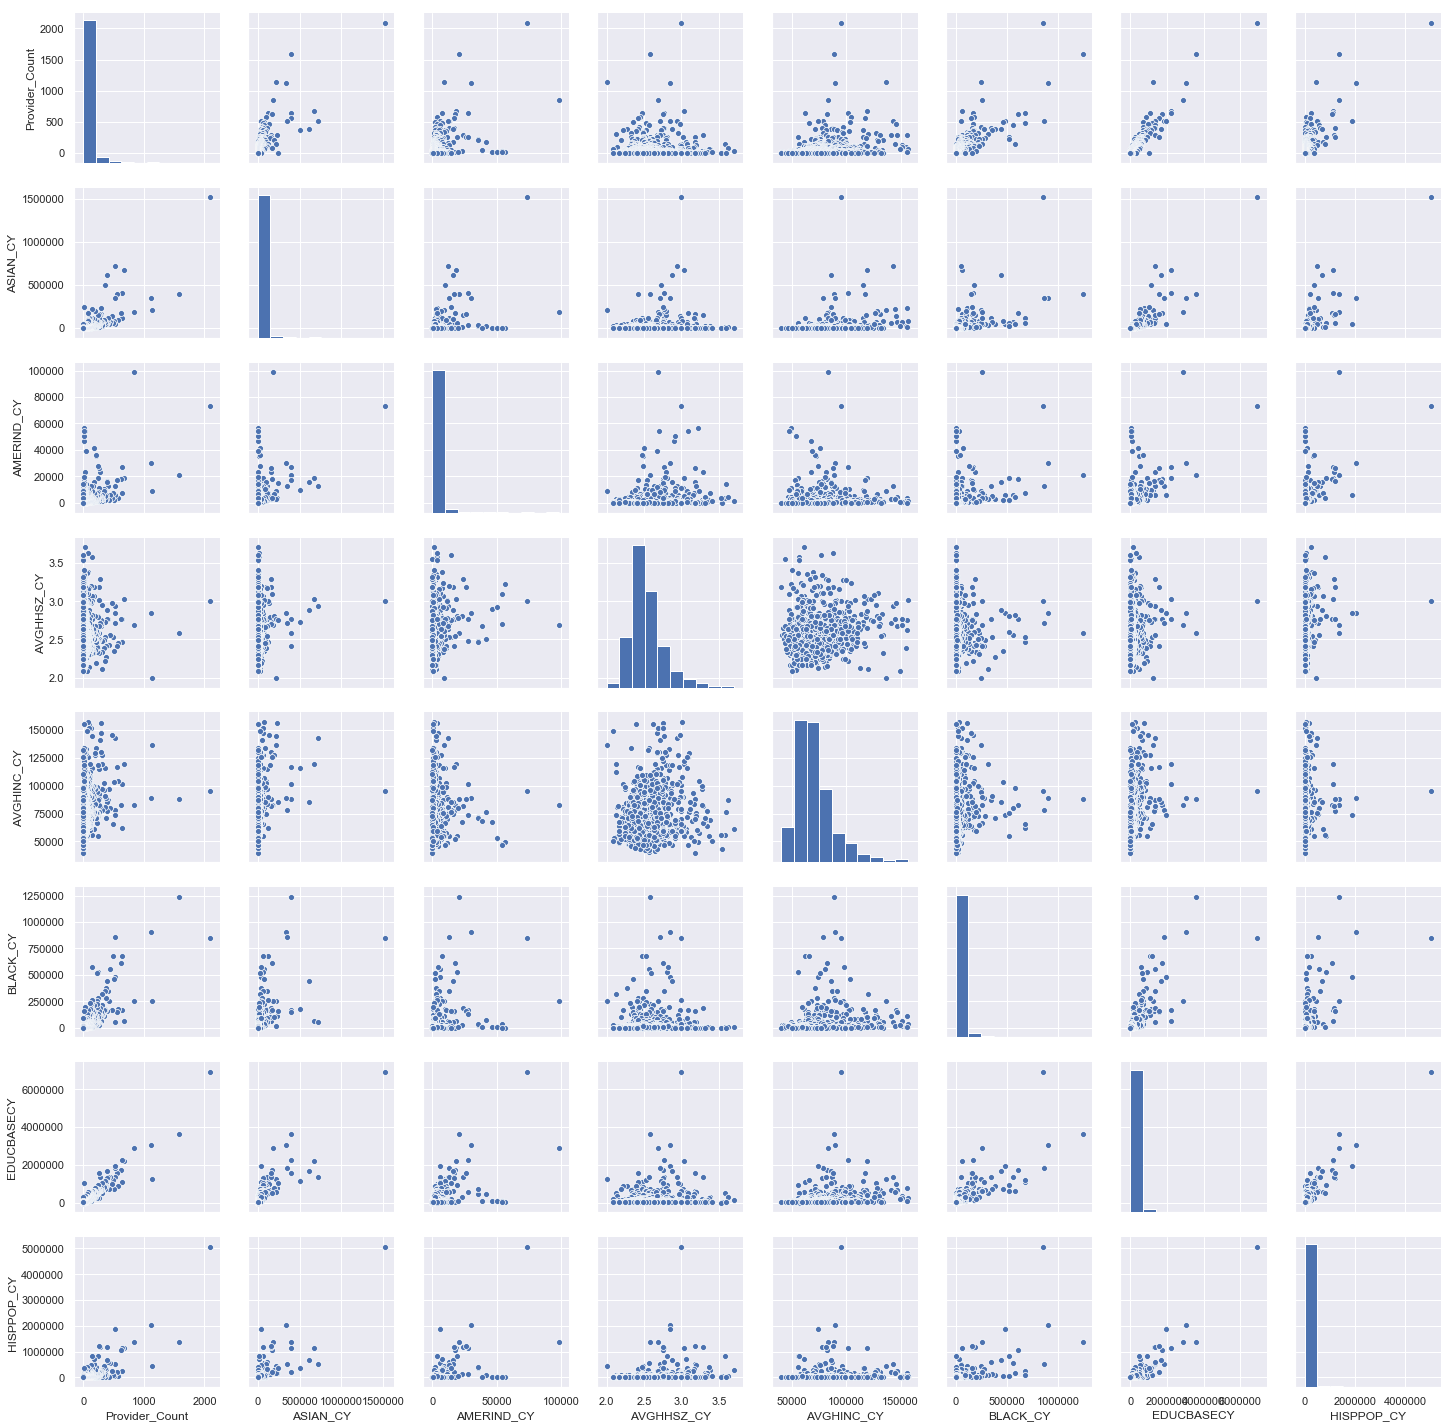

In [163]:
sns.pairplot(test_newcounty_df.iloc[:,2:10])

In [63]:
test_newcounty_df[test_newcounty_df['ASIAN_CY']>1250000]

regionabbr           subregion  Provider_Count   ASIAN_CY  AMERIND_CY  \
0         CA  Los Angeles County            2094  1517296.0     73559.0   

   AVGHHSZ_CY  AVGHINC_CY  BLACK_CY  EDUCBASECY  HISPPOP_CY  MEDAGE_CY  \
0         3.0     94861.0  850350.0   6899087.0   5043293.0       35.7   

   MINORITYCY  OTHRACE_CY   PCI_CY  POPDENS_CY  UNEMPRT_CY   WHITE_CY  \
0   7644196.0   2305030.0  31563.0      2535.5         4.5  5019340.0   

   X8001_A  X8002_A  X8013_A  X8018_A  X8019_A  X8024_A  X8032_A  X13002_A  \
0  5905.52  3907.44   579.43  1998.08  1132.94    59.76    118.6    399.93   

   X13004_A  
0   9046.16

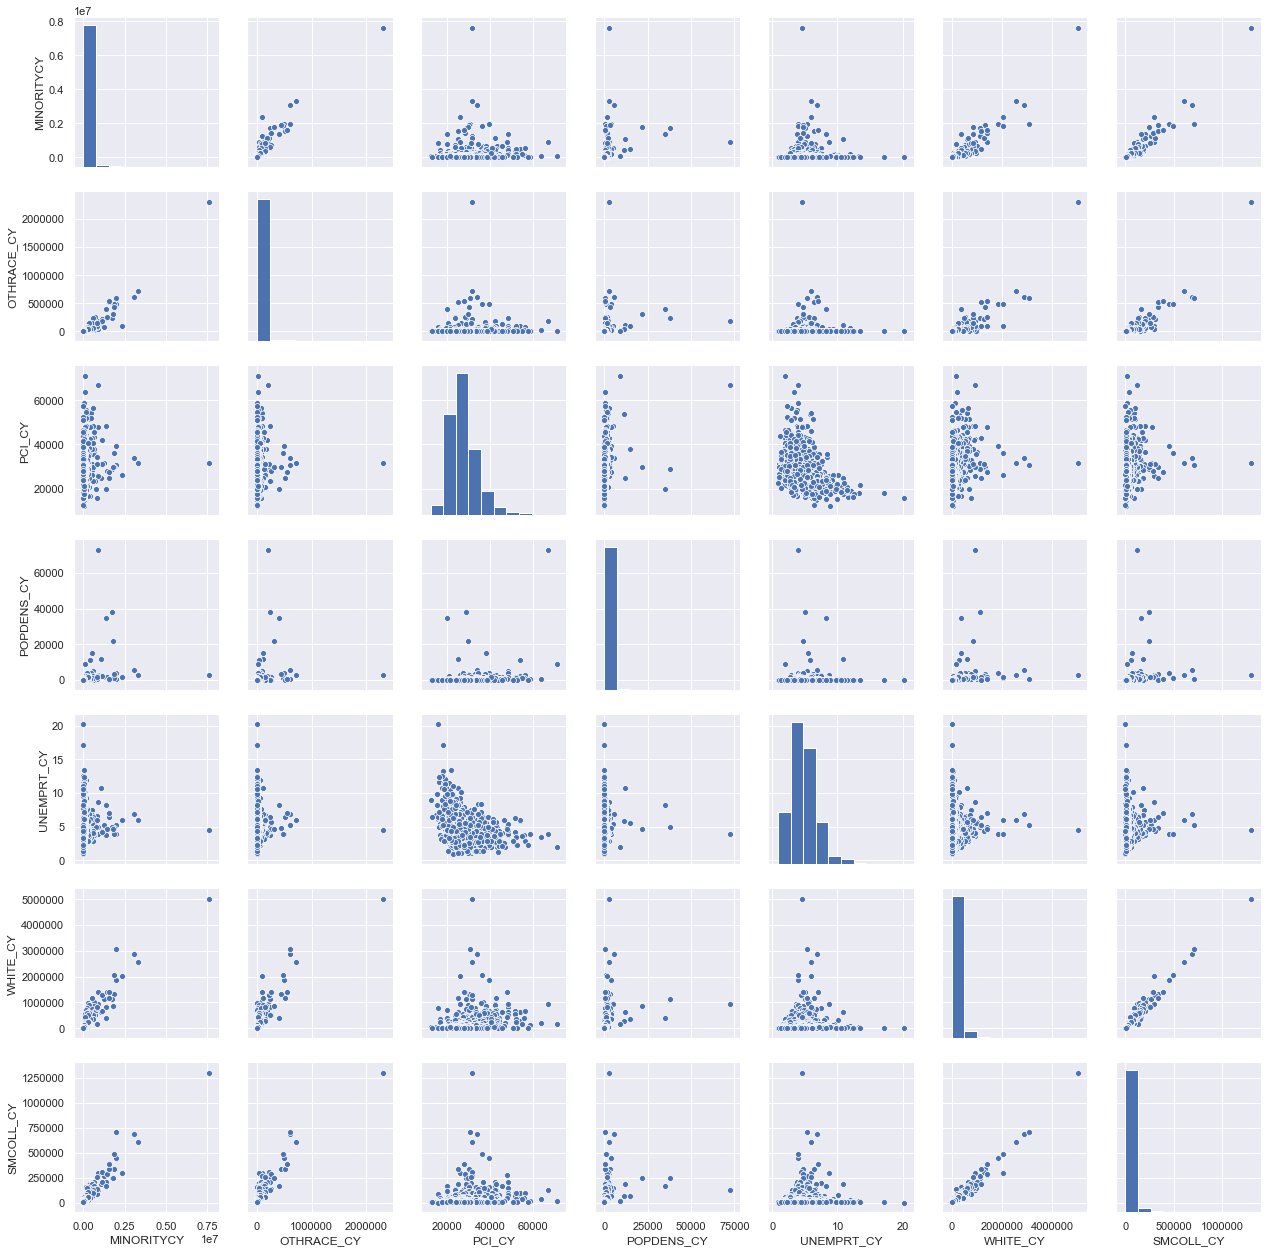

In [164]:
sns.pairplot(test_newcounty_df.iloc[:,11:18])

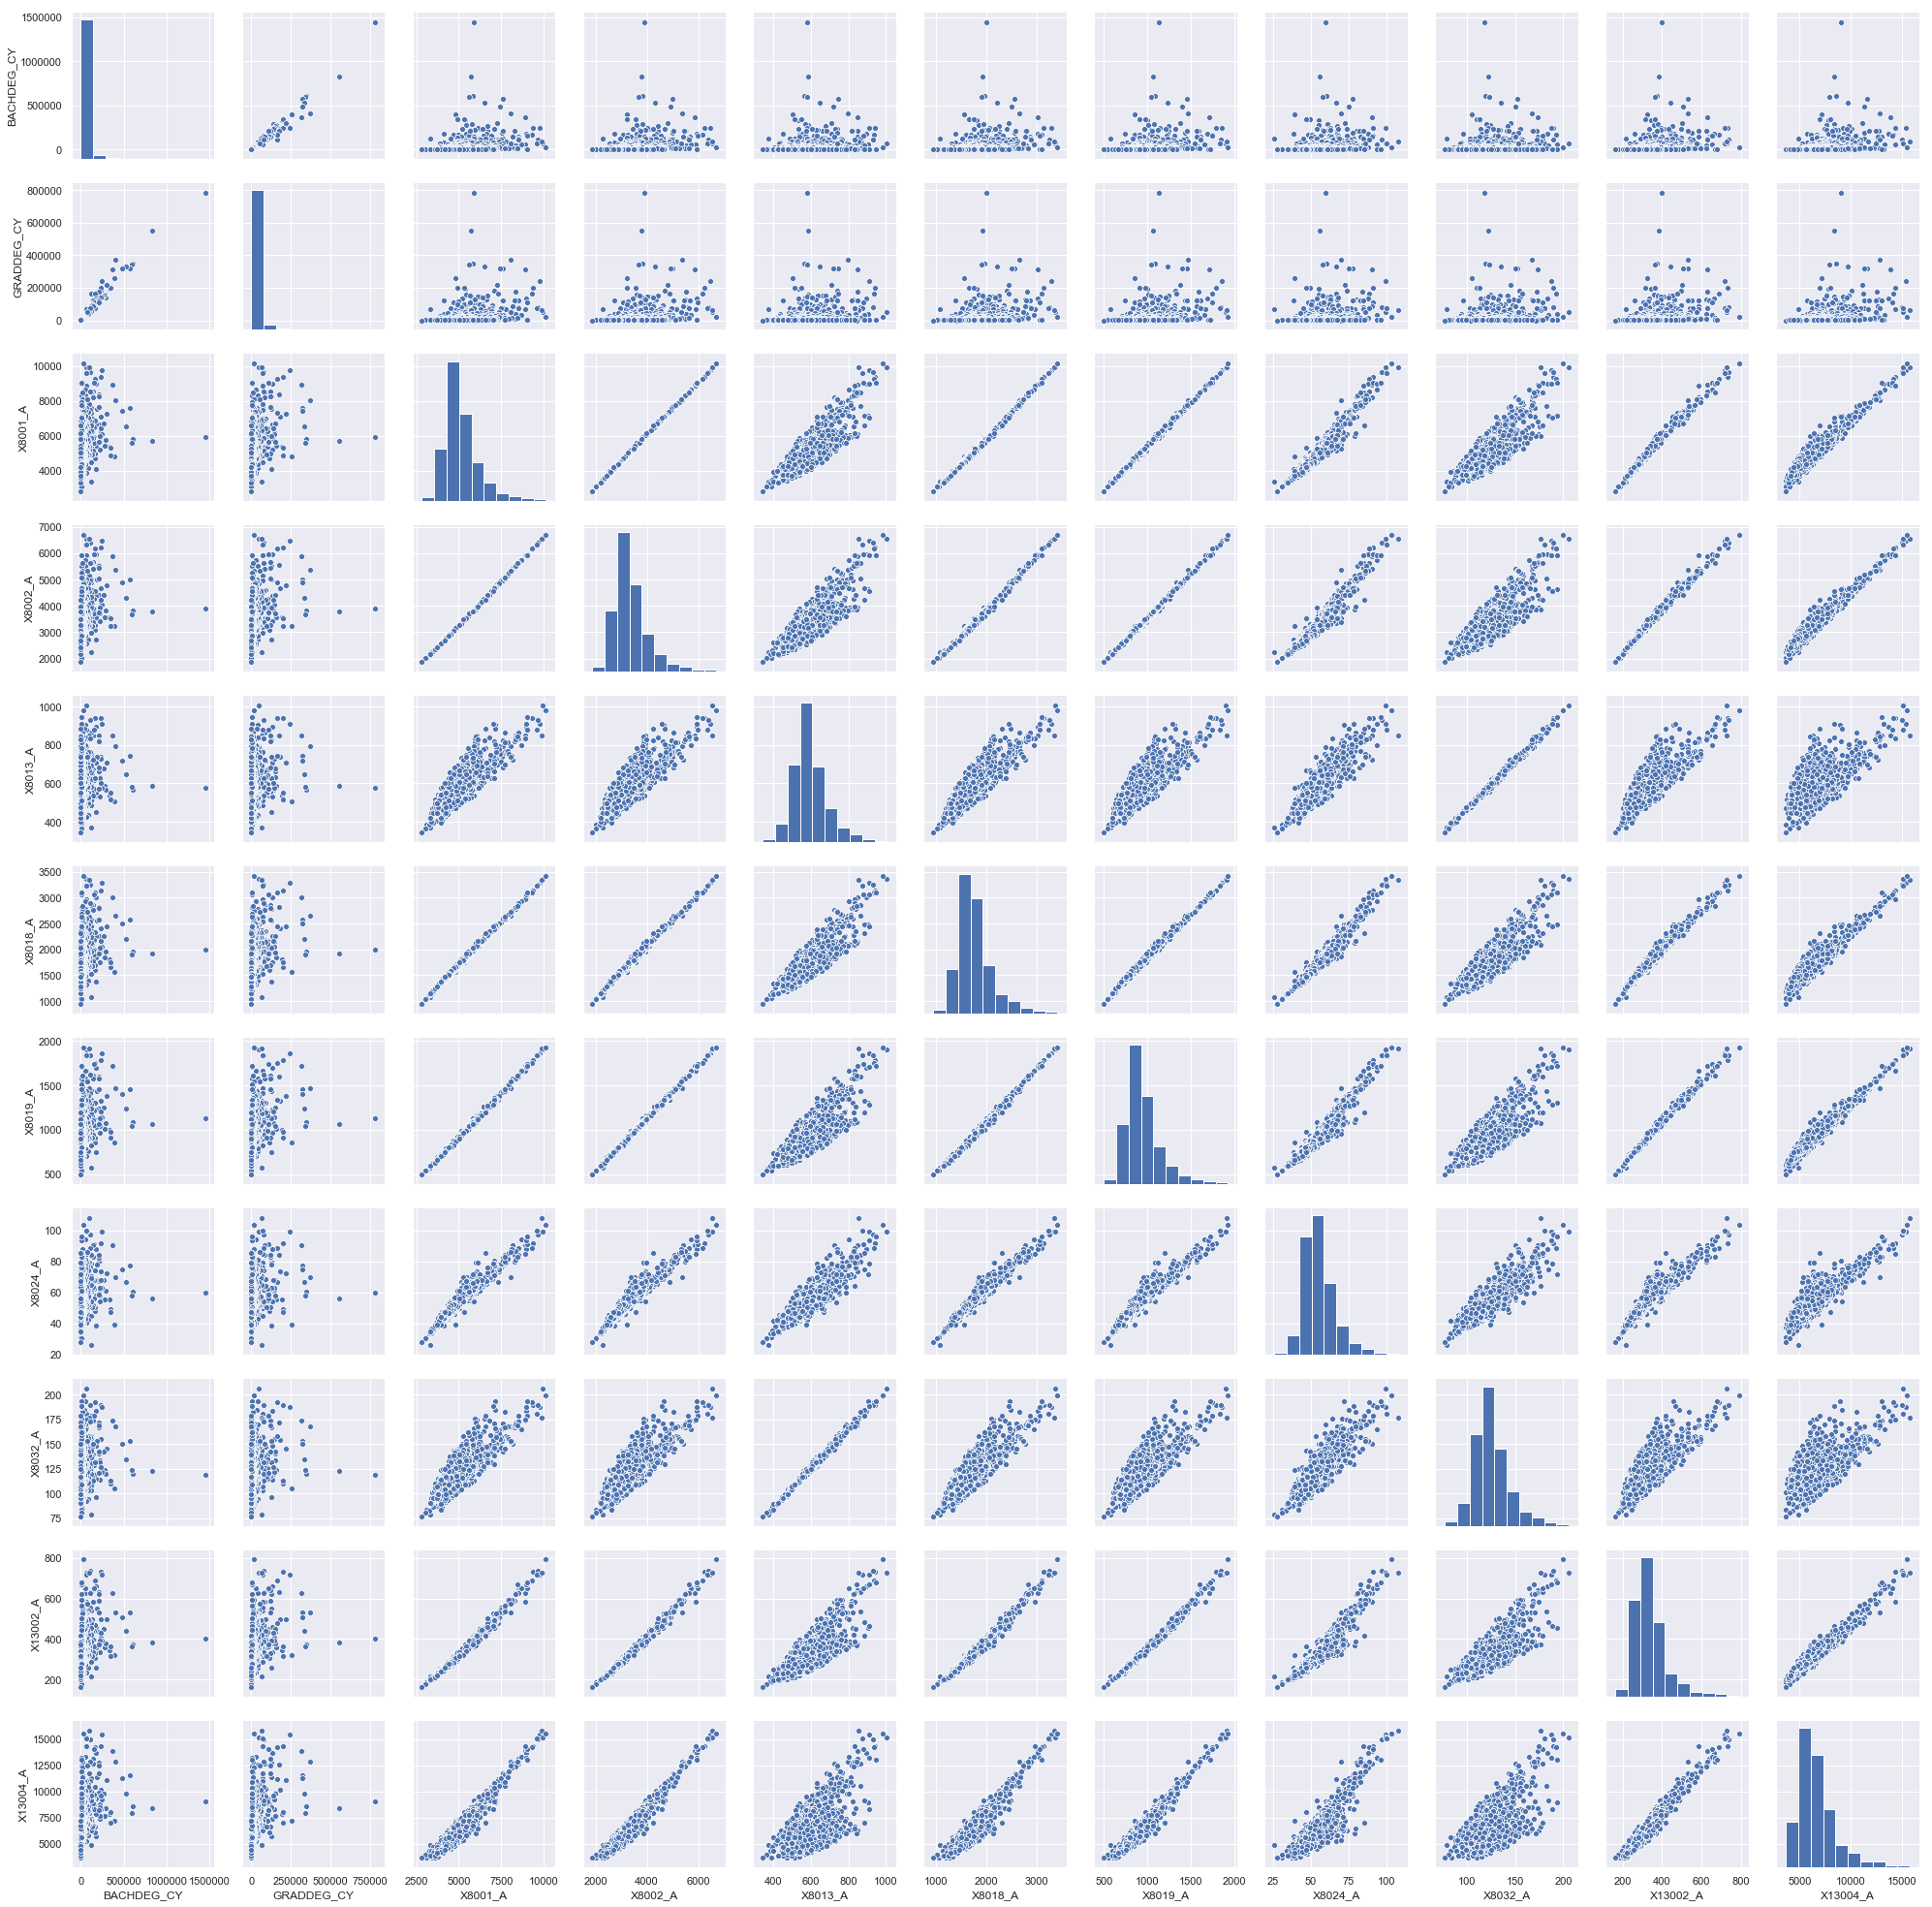

In [165]:
sns.pairplot(test_newcounty_df.iloc[:,19:])

(array([193., 132., 242., 213., 155., 101.,  62.,  42.,  13.,   4.]),
 array([0.        , 0.76468314, 1.52936628, 2.29404942, 3.05873256,
        3.8234157 , 4.58809883, 5.35278197, 6.11746511, 6.88214825,
        7.64683139]),
 <a list of 10 Patch objects>)

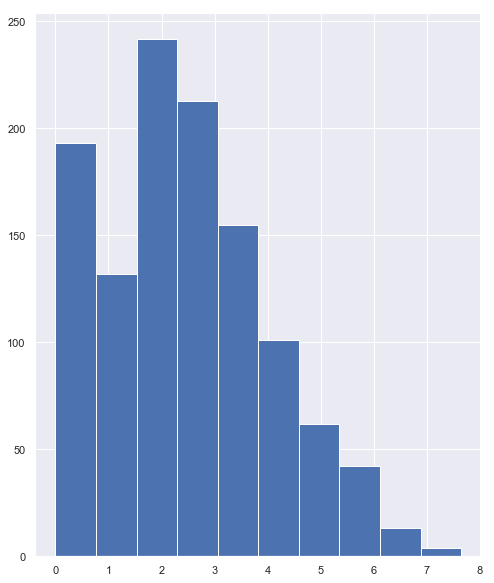

In [204]:
plt.hist(np.log(test_newcounty_df.iloc[:,2]), bins=10)

#### Correlation

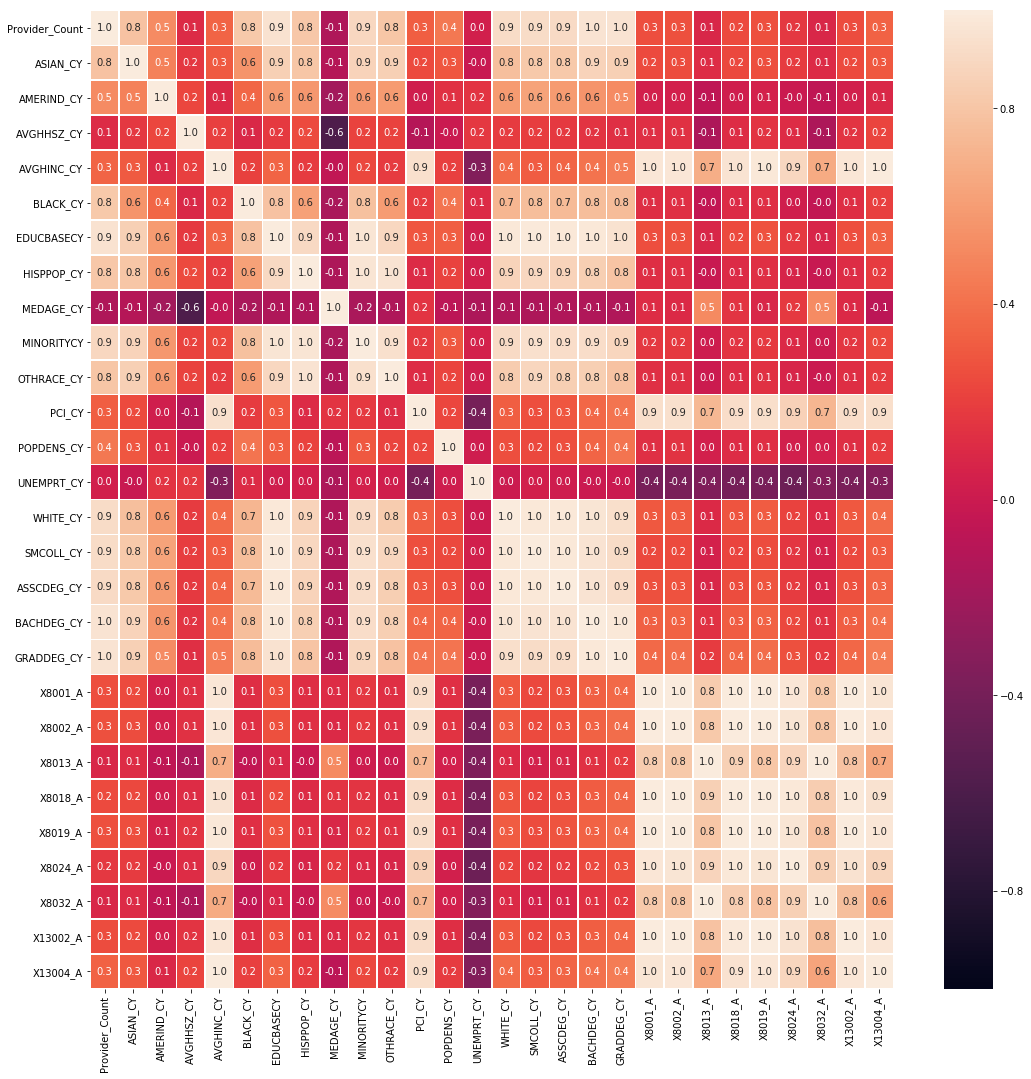

In [190]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(test_newcounty_df.corr(), vmin=-1.0, vmax=1.0, annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [167]:
test_newcounty_df.head()

regionabbr           subregion  Provider_Count   ASIAN_CY  AMERIND_CY  \
0         CA  Los Angeles County            2094  1517296.0     73559.0   
1         IL         Cook County            1586   395712.0     21113.0   
2         NY     New York County            1136   212844.0      8756.0   
3         TX       Harris County            1124   341640.0     30001.0   
4         AZ     Maricopa County             844   184150.0     98584.0   

   AVGHHSZ_CY  AVGHINC_CY   BLACK_CY  EDUCBASECY  HISPPOP_CY  MEDAGE_CY  \
0        3.00     94861.0   850350.0   6899087.0   5043293.0       35.7   
1        2.58     88254.0  1233716.0   3607345.0   1374256.0       36.6   
2        2.00    136860.0   247085.0   1251653.0    441304.0       37.9   
3        2.85     89252.0   901459.0   3029538.0   2035551.0       33.5   
4        2.69     83005.0   253576.0   2891837.0   1373153.0       35.8   

   MINORITYCY  OTHRACE_CY   PCI_CY  POPDENS_CY  UNEMPRT_CY   WHITE_CY  \
0   7644196.0   2305030.0  31563.0      2535.5         4.5  5019340.0   
1   3078944.0    608672.0  34083.0      5579.2         6.9  2859209.0   
2    899778.0    193191.0  66805.0     72736.2         3.9   924396.0   
3   3339578.0    712410.0  31405.0      2780.1         5.9  2573473.0   
4   1981147.0    598035.0  30701.0       476.9         5.3  3066684.0   

   SMCOLL_CY  ASSCDEG_CY  BACHDEG_CY  GRADDEG_CY  X8001_A  X8002_A  X8013_A  \
0  1300786.0    469649.0   1445895.0    782758.0  5905.52  3907.44   579.43   
1   690225.0    237028.0    830433.0    552050.0  5692.87  3774.06   585.60   
2   121070.0     48360.0    406878.0    371255.0  8035.56  5382.10   796.17   
3   606842.0    193511.0    605813.0    345886.0  5800.32  3840.81   564.48   
4   711033.0    241714.0    597653.0    342159.0  5574.19  3675.76   581.95   

   X8018_A  X8019_A  X8024_A  X8032_A  X13002_A  X13004_A  
0  1998.08  1132.94    59.76   118.60    399.93   9046.16  
1  1918.81  1061.74    56.05   122.50    381.05   8356.49  
2  2653.46  1464.96    69.80   167.61    530.01  12793.70  
3  1959.50  1087.37    60.64   119.69    374.86   8547.08  
4  1898.43  1041.69    57.84   123.67    362.02   7908.62

## Run models

### Define Response and Predictor Variables

In [17]:
# Create prdictor and response variables
train_x = test_newcounty_df.iloc[:,3:]
train_y = test_newcounty_df.iloc[:,2]
train_x.head()

ASIAN_CY  AMERIND_CY  AVGHHSZ_CY  AVGHINC_CY   BLACK_CY  EDUCBASECY  \
0  1517296.0     73559.0        3.00     94861.0   850350.0   6899087.0   
1   395712.0     21113.0        2.58     88254.0  1233716.0   3607345.0   
2   212844.0      8756.0        2.00    136860.0   247085.0   1251653.0   
3   341640.0     30001.0        2.85     89252.0   901459.0   3029538.0   
4   184150.0     98584.0        2.69     83005.0   253576.0   2891837.0   

   HISPPOP_CY  MEDAGE_CY  MINORITYCY  OTHRACE_CY   PCI_CY  POPDENS_CY  \
0   5043293.0       35.7   7644196.0   2305030.0  31563.0      2535.5   
1   1374256.0       36.6   3078944.0    608672.0  34083.0      5579.2   
2    441304.0       37.9    899778.0    193191.0  66805.0     72736.2   
3   2035551.0       33.5   3339578.0    712410.0  31405.0      2780.1   
4   1373153.0       35.8   1981147.0    598035.0  30701.0       476.9   

   UNEMPRT_CY   WHITE_CY  SMCOLL_CY  ASSCDEG_CY  BACHDEG_CY  GRADDEG_CY  \
0         4.5  5019340.0  1300786.0    469649.0   1445895.0    782758.0   
1         6.9  2859209.0   690225.0    237028.0    830433.0    552050.0   
2         3.9   924396.0   121070.0     48360.0    406878.0    371255.0   
3         5.9  2573473.0   606842.0    193511.0    605813.0    345886.0   
4         5.3  3066684.0   711033.0    241714.0    597653.0    342159.0   

   X8001_A  X8002_A  X8013_A  X8018_A  X8019_A  X8024_A  X8032_A  X13002_A  \
0  5905.52  3907.44   579.43  1998.08  1132.94    59.76   118.60    399.93   
1  5692.87  3774.06   585.60  1918.81  1061.74    56.05   122.50    381.05   
2  8035.56  5382.10   796.17  2653.46  1464.96    69.80   167.61    530.01   
3  5800.32  3840.81   564.48  1959.50  1087.37    60.64   119.69    374.86   
4  5574.19  3675.76   581.95  1898.43  1041.69    57.84   123.67    362.02   

   X13004_A  
0   9046.16  
1   8356.49  
2  12793.70  
3   8547.08  
4   7908.62

In [18]:
train_y.head()

0    2094
1    1586
2    1136
3    1124
4     844
Name: Provider_Count, dtype: int64

### Base Model

In [19]:
import statsmodels.api as sm
import statsmodels
from statsmodels.regression import linear_model

In [153]:
# Standard Scalar
from sklearn.preprocessing import StandardScaler
sc_data = StandardScaler()
train_x_std = sc_data.fit_transform(train_x)
# train_x_std = pd.DataFrame(train_x_std, columns=train_x.columns)
# train_x_std.head()

#### LR using Scikit

In [154]:
# Run using scikit learn
from sklearn.linear_model import LinearRegression
lm_scaled = LinearRegression().fit(train_x_std, train_y)

In [155]:
r_sq = lm_scaled.score(train_x_std, train_y)
r_sq

0.9620517643321564

In [156]:
cdf_scaled = pd.DataFrame(lm_scaled.coef_, 
                          index=train_x.columns, columns=['coefficients'])
cdf_scaled

coefficients
ASIAN_CY      -35.812110
AMERIND_CY     -2.135590
AVGHHSZ_CY      7.401292
AVGHINC_CY    106.714272
BLACK_CY       -4.675497
EDUCBASECY    134.690855
HISPPOP_CY    -30.255564
MEDAGE_CY      -7.168514
MINORITYCY     42.346148
OTHRACE_CY      2.416410
PCI_CY         50.365772
POPDENS_CY      7.653336
UNEMPRT_CY      0.907643
WHITE_CY       -2.673876
SMCOLL_CY     -11.424865
ASSCDEG_CY    -64.944497
BACHDEG_CY      5.125451
GRADDEG_CY     81.003791
X8001_A     16889.782281
X8002_A    -11335.742930
X8013_A      -176.620165
X8018_A     -5777.103156
X8019_A       519.984844
X8024_A       -28.897533
X8032_A        99.863511
X13002_A       61.625959
X13004_A     -452.524456

#### LR using Stats Models

In [20]:
X_train = train_x
X_train = sm.add_constant(X_train)
sm_ols = sm.OLS(train_y, X_train).fit() 

# Xscaled_train = train_x_std
# Xscaled_train = sm.add_constant(Xscaled_train)
# sm_ols = sm.OLS(train_y, Xscaled_train).fit() # i know, the param order is inverse
# sm_model = sm_ols.fit()

C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [21]:
# sm_model.summary()
sm_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Provider_Count   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     1060.
Date:                Sun, 04 Aug 2019   Prob (F-statistic):               0.00
Time:                        11:22:05   Log-Likelihood:                -5313.3
No. Observations:                1157   AIC:                         1.068e+04
Df Residuals:                    1129   BIC:                         1.082e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -23.9135     32.498     -0.736      0.462     -87.677      39.850
ASIAN_CY      -0.0005      0.000     -2.675      0.008      -0.001      -0.000
AMERIND_CY    -0.0003      0.000     -1.445      0.149      -0.001       0.000
AVGHHSZ_CY    32.1076     10.026      3.202      0.001      12.435      51.780
AVGHINC_CY     0.0058      0.005      1.220      0.223      -0.004       0.015
BLACK_CY   -5.409e-05      0.000     -0.314      0.753      -0.000       0.000
EDUCBASECY     0.0004   9.39e-05      4.152      0.000       0.000       0.001
HISPPOP_CY    -0.0001      0.000     -0.810      0.418      -0.000       0.000
MEDAGE_CY     -1.3986      0.394     -3.554      0.000      -2.171      -0.626
MINORITYCY     0.0001      0.000      0.684      0.494      -0.000       0.000
OTHRACE_CY  2.788e-05   7.06e-05      0.395      0.693      -0.000       0.000
PCI_CY         0.0072      0.001      7.250      0.000       0.005       0.009
POPDENS_CY     0.0027      0.000      5.947      0.000       0.002       0.004
UNEMPRT_CY     0.4506      0.444      1.015      0.310      -0.421       1.322
WHITE_CY   -9.198e-06   5.66e-05     -0.162      0.871      -0.000       0.000
SMCOLL_CY     -0.0002      0.000     -1.304      0.192      -0.000    8.48e-05
ASSCDEG_CY    -0.0025      0.000     -9.262      0.000      -0.003      -0.002
BACHDEG_CY   6.69e-05      0.000      0.605      0.545      -0.000       0.000
GRADDEG_CY     0.0017      0.000     13.596      0.000       0.001       0.002
X8001_A       16.3794    140.723      0.116      0.907    -259.728     292.487
X8002_A      -16.4556    140.721     -0.117      0.907    -292.560     259.649
X8013_A       -1.9300      0.485     -3.980      0.000      -2.882      -0.978
X8018_A      -16.8438    140.749     -0.120      0.905    -293.003     259.315
X8019_A        2.5341      0.508      4.991      0.000       1.538       3.530
X8024_A       -2.7121      2.189     -1.239      0.216      -7.006       1.582
X8032_A        5.5237      2.522      2.191      0.029       0.576      10.471
X13002_A       0.7234      0.303      2.391      0.017       0.130       1.317
X13004_A      -0.2368      0.054     -4.351      0.000      -0.344      -0.130
==============================================================================
Omnibus:                      357.654   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25889.460
Skew:                          -0.481   Prob(JB):                         0.00
Kurtosis:                      26.154   Cond. No.                     2.23e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.23e+08. This might i

In [31]:
# Calculate RMSE of model
from statsmodels.tools.eval_measures import rmse
pred_val = sm_ols.fittedvalues.copy()
rmse_base_ols = rmse(train_y, pred_val)
round(rmse_base_ols,2)

23.89

- The R-squared value of 0.962 shows that 96.2% of the variability in Provider Count is explained by the model. The R-squared value is too good to be true and the model seems to be overfitting.
 
- To identify variables that are statistically significant, we look at the p-values of individual variables. Among the coefficients, those that are statistically significant at 10% significance level are:  
    - ASIAN_CY, AVGHHSZ_CY, EDUCBASECY, MEDAGE_CY, PCI_CY, POPDENS_CY, ASSCDEG_CY, GRADDEG_CY, X8013_A, X8019_A, X13004_A.

- The p-value of F-statistic is less than 0.05 which shows that atleast one of the predicting variables has predicting power on the variability of Provider Count.

##### Verify Assumptions

In [26]:
# Assumptions
residual = sm_ols.resid

((array([-3.23939842, -2.97735551, -2.83132703, ...,  2.83132703,
          2.97735551,  3.23939842]),
  array([-229.91427087, -194.4806102 , -140.41088765, ...,  148.84914723,
          171.6118837 ,  188.51253474])),
 (20.21742030286205, -2.4748077617010875e-10, 0.8442807180595832))

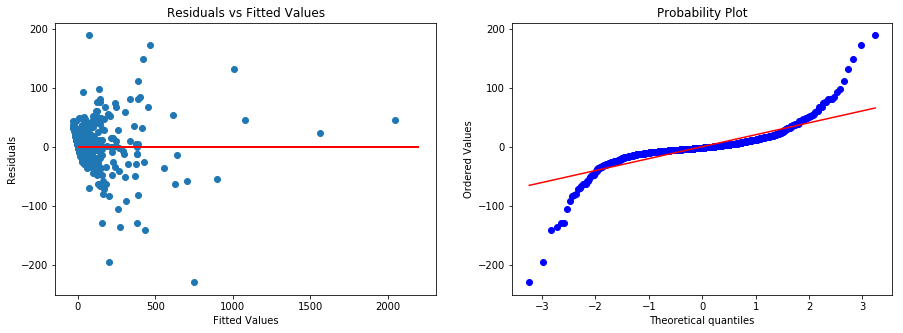

In [247]:
import scipy as sp
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))

# Residuals vs Fitted
ax1.scatter(pred_val, residual)
ax1.hlines(y=0, xmin=0, xmax=2200, linewidth=2, color='r')
ax1.set_xlabel('Fitted Values')
ax1.set_ylabel('Residuals')
ax1.set_title('Residuals vs Fitted Values')

# QQ plot
sp.stats.probplot(residual, plot=ax2, fit=True)

1. Residuals vs Fitted plot
    - **Constant Variance**: From the plot, we observe a departure from constant variance as the distance of data points from zero are not consistently equal. We can see that the residuals are closer to 0 in the beggining but values start to go up as we move a little towards the right of the plot.
    - **Independence**:  We see that the data is clustered together and is not randomly distributed. This indicates a slight departure from independence as clusters of residuals generally indicate correlation errors, or an indication that multicollinearity exists in parts of the data.


2. Probability Plot
    - **Normality**: From this plot, we can see that the residuals have tails on both the positive and negative side. Although the residuals stay close to The residuals are heavily tailed showing violation of Normality assumption.


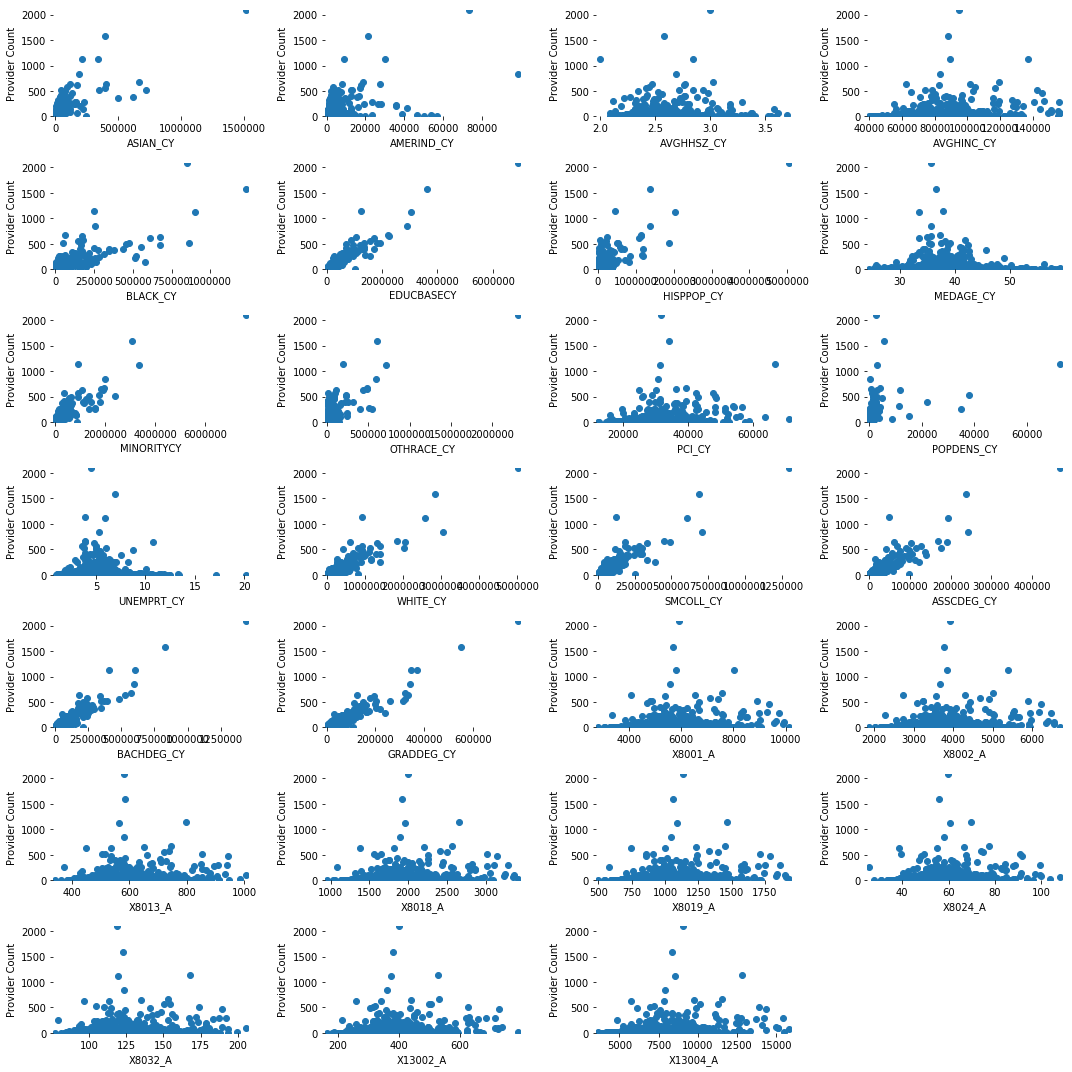

In [102]:
# Check Linearity - Plot predictors with response
states = test_newcounty_df.columns[3:]
fig = plt.figure(figsize=(15, 15))
for sp in range(0,27):
    ax = fig.add_subplot(7,4,sp+1)
#     provType = unique_df[unique_df['state']==states[sp]]['provider_type'].value_counts().reset_index()
#     ax.scatter(test_newcounty_df.iloc[:,2], test_newcounty_df.loc[:,states[sp]])
    ax.scatter(test_newcounty_df.loc[:,states[sp]], test_newcounty_df.iloc[:,2])
    ax.set_xlabel(states[sp])
    ax.set_ylabel('Provider Count')
#     ax.set_ylim(0,provType.iloc[0,1])
    plt.xticks(rotation=0)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.margins(0.01, 0)
plt.tight_layout() # automatically adjusts layout to fit long labels
plt.show()

1. Predictors vs Response
     - **Linearity** - From the plot above, we can see the each predictor variable is either strongly or weakly related to response variable. From this plot, we can sya that the Linearity assumption holds.

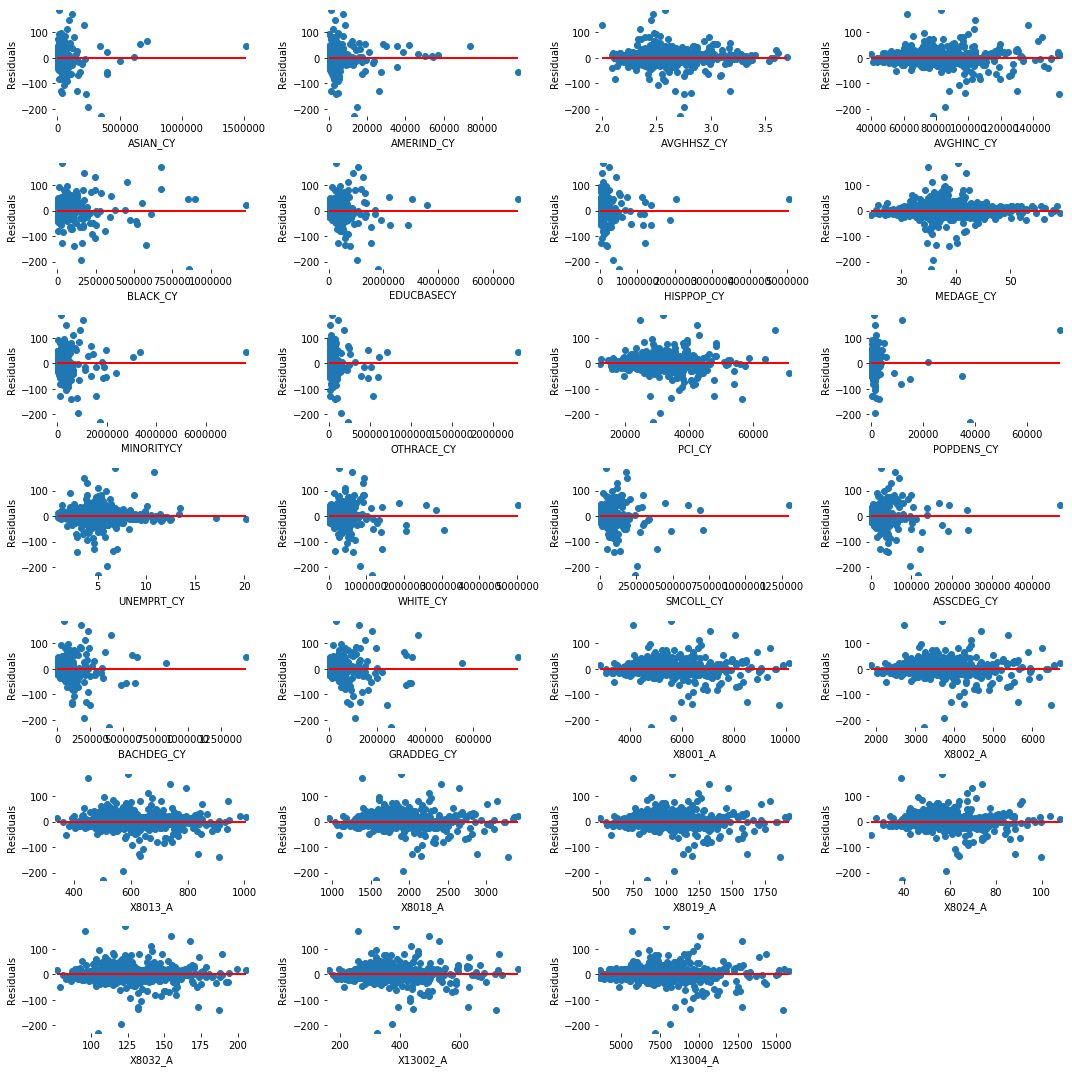

In [106]:
# Check Linearity - Plot predictors with residuals
states = test_newcounty_df.columns[3:]
fig = plt.figure(figsize=(15, 15))

for sp in range(0,27):
    mini = min(test_newcounty_df.loc[:,states[sp]])
    maxi = max(test_newcounty_df.loc[:,states[sp]])
    ax = fig.add_subplot(7,4,sp+1)
    ax.scatter(test_newcounty_df.loc[:,states[sp]], residual)
    ax.hlines(y=0, xmin=mini, xmax=maxi, linewidth=2, color='r')
    ax.set_xlabel(states[sp])
    ax.set_ylabel('Residuals')
#     ax.set_ylim(0,provType.iloc[0,1])
    plt.xticks(rotation=0)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.margins(0.01, 0)
plt.tight_layout() # automatically adjusts layout to fit long labels
plt.show()

##### Outlier Detection

One way to think about whether the results we have are driven by a given data point is to calculate how far the predicted values for data would move if model was fit without the data point in question. This calculated total distance is called Cook's distance. Cook's D is a function of the leverage and standardized residual associated with each data point. The influence of each point can be visualized using an Influence Plot.

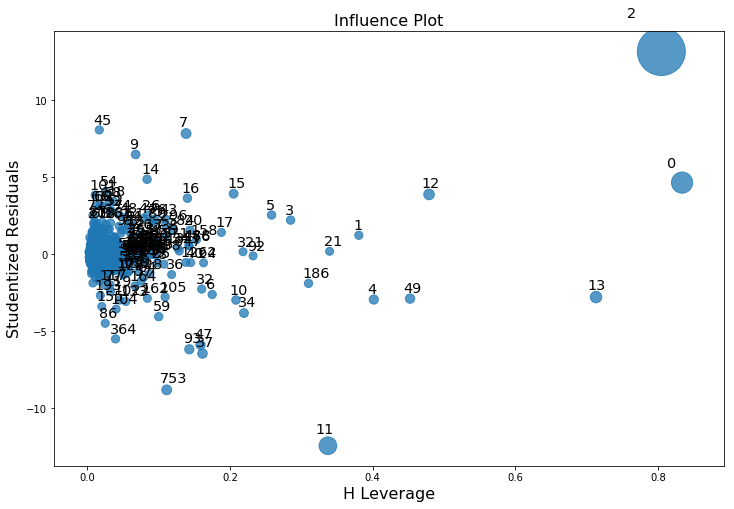

In [175]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(sm_ols, ax= ax, criterion="cooks")

From this plot, we can see that points towards the right (2, 0, 13) are away from both x and y axis and hence are influential points. Points 12, 49 and 11 are a little further from the axes but not as much as 2 and can be considered outliers.

##### Test removing outliers

In [54]:
test_newcounty_df.head(50)

regionabbr              subregion  Provider_Count   ASIAN_CY  AMERIND_CY  \
0          CA     Los Angeles County            2094  1517296.0     73559.0   
1          IL            Cook County            1586   395712.0     21113.0   
2          NY        New York County            1136   212844.0      8756.0   
3          TX          Harris County            1124   341640.0     30001.0   
4          AZ        Maricopa County             844   184150.0     98584.0   
5          CA          Orange County             668   667421.0     18749.0   
6          CA       San Diego County             646   401095.0     27438.0   
7          PA    Philadelphia County             636   118378.0      7744.0   
8          TX          Dallas County             623   170268.0     17668.0   
9          MI         Oakland County             572    95431.0      3461.0   
10         WA            King County             560   395459.0     17234.0   
11         NY           Kings County             521   346905.0     13068.0   
12         CA     Santa Clara County             519   721646.0     12394.0   
13         FL      Miami-Dade County             517    42319.0      5960.0   
14         GA          Fulton County             499    79638.0      2142.0   
15         MI           Wayne County             484    61221.0      7296.0   
16         NY          Nassau County             470   135762.0      3725.0   
17         FL         Broward County             442    70007.0      6003.0   
18         MO       St. Louis County             420    44317.0      2098.0   
19         TX         Tarrant County             400   114185.0     12805.0   
20         TX           Bexar County             399    58513.0     16563.0   
21         NY          Queens County             390   616629.0     15902.0   
22         OH        Cuyahoga County             379    40682.0      2559.0   
23         FL      Palm Beach County             379    39780.0      6004.0   
24         CA         Alameda County             366   501246.0      9664.0   
25         PA       Allegheny County             366    49510.0      1861.0   
26         NC     Mecklenburg County             361    66691.0      4856.0   
27         MN        Hennepin County             347    95783.0     10369.0   
28         TX          Travis County             343    86195.0      9017.0   
31         OH        Hamilton County             317    22235.0      1444.0   
32         NY         Suffolk County             317    63150.0      5873.0   
33         CT        Hartford County             313    49817.0      2992.0   
34         DC   District of Columbia             307    28505.0      2614.0   
36         NY     Westchester County             295    62160.0      4721.0   
37         VA         Fairfax County             293   227121.0      3739.0   
38         NJ          Bergen County             288   161749.0      2525.0   
40         CA  San Bernardino County             282   154148.0     23628.0   
41         CT       Fairfield County             281    54522.0      2722.0   
42         IL          DuPage County             264   112496.0      2354.0   
43         NY            Erie County             261    36357.0      6172.0   
44         UT       Salt Lake County             257    50721.0     11293.0   
45         PA          Lehigh County             257    13261.0      1474.0   
46         CT       New Haven County             254    37276.0      3027.0   
47         CA       Riverside County             252   157849.0     26478.0   
48         OK        Oklahoma County             251    30261.0     28149.0   
49         NY           Bronx County             251    58341.0     19024.0   
51         OR       Multnomah County             247    62565.0      8177.0   
52         FL           Duval County             244    46717.0      3633.0   
53         TX          Collin County             241   148227.0      5298.0   
54         RI      Providence County             234 

In [116]:
test_LA = test_newcounty_df.copy()
test_LA.drop([0,1,2,3,4,5,6,10,11,12,13,21,49,186], axis=0, inplace=True)

In [117]:
test_LA.shape

(1143, 30)

In [118]:
test_LA[test_LA['GRADDEG_CY']>300000]

Empty DataFrame
Columns: [regionabbr, subregion, Provider_Count, ASIAN_CY, AMERIND_CY, AVGHHSZ_CY, AVGHINC_CY, BLACK_CY, EDUCBASECY, HISPPOP_CY, MEDAGE_CY, MINORITYCY, OTHRACE_CY, PCI_CY, POPDENS_CY, UNEMPRT_CY, WHITE_CY, SMCOLL_CY, ASSCDEG_CY, BACHDEG_CY, GRADDEG_CY, X8001_A, X8002_A, X8013_A, X8018_A, X8019_A, X8024_A, X8032_A, X13002_A, X13004_A]
Index: []

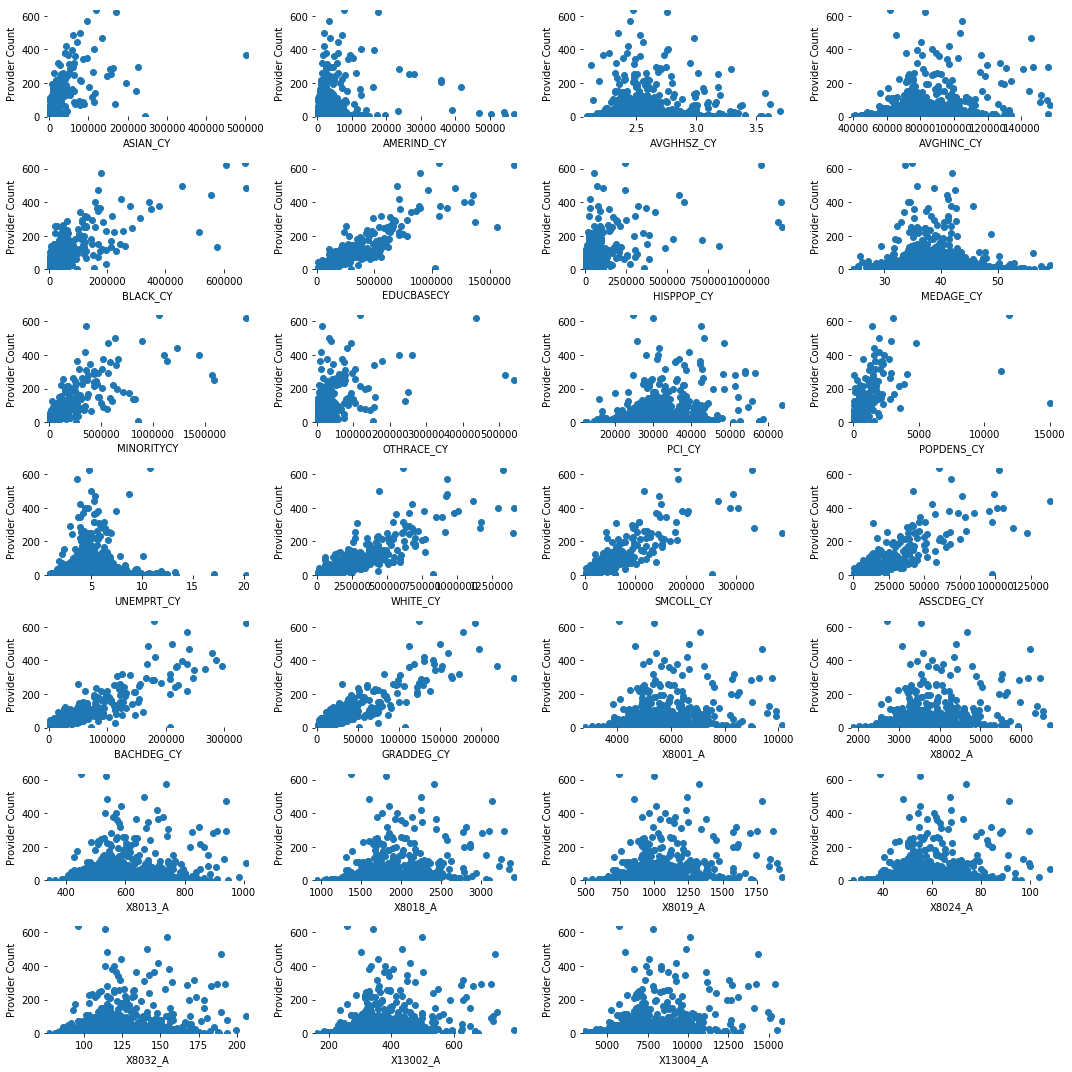

In [119]:
# Check Linearity - Plot predictors with response
states = test_LA.columns[3:]
fig = plt.figure(figsize=(15, 15))
for sp in range(0,27):
    ax = fig.add_subplot(7,4,sp+1)
#     provType = unique_df[unique_df['state']==states[sp]]['provider_type'].value_counts().reset_index()
#     ax.scatter(test_newcounty_df.iloc[:,2], test_newcounty_df.loc[:,states[sp]])
    ax.scatter(test_LA.loc[:,states[sp]], test_LA.iloc[:,2])
    ax.set_xlabel(states[sp])
    ax.set_ylabel('Provider Count')
#     ax.set_ylim(0,provType.iloc[0,1])
    plt.xticks(rotation=0)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.margins(0.01, 0)
plt.tight_layout() # automatically adjusts layout to fit long labels
plt.show()

In [120]:
# Create prdictor and response variables
train_x_LA = test_LA.iloc[:,3:]
train_y_LA = test_LA.iloc[:,2]
train_x.head()

ASIAN_CY  AMERIND_CY  AVGHHSZ_CY  AVGHINC_CY   BLACK_CY  EDUCBASECY  \
0  1517296.0     73559.0        3.00     94861.0   850350.0   6899087.0   
1   395712.0     21113.0        2.58     88254.0  1233716.0   3607345.0   
2   212844.0      8756.0        2.00    136860.0   247085.0   1251653.0   
3   341640.0     30001.0        2.85     89252.0   901459.0   3029538.0   
4   184150.0     98584.0        2.69     83005.0   253576.0   2891837.0   

   HISPPOP_CY  MEDAGE_CY  MINORITYCY  OTHRACE_CY   PCI_CY  POPDENS_CY  \
0   5043293.0       35.7   7644196.0   2305030.0  31563.0      2535.5   
1   1374256.0       36.6   3078944.0    608672.0  34083.0      5579.2   
2    441304.0       37.9    899778.0    193191.0  66805.0     72736.2   
3   2035551.0       33.5   3339578.0    712410.0  31405.0      2780.1   
4   1373153.0       35.8   1981147.0    598035.0  30701.0       476.9   

   UNEMPRT_CY   WHITE_CY  SMCOLL_CY  ASSCDEG_CY  BACHDEG_CY  GRADDEG_CY  \
0         4.5  5019340.0  1300786.0    469649.0   1445895.0    782758.0   
1         6.9  2859209.0   690225.0    237028.0    830433.0    552050.0   
2         3.9   924396.0   121070.0     48360.0    406878.0    371255.0   
3         5.9  2573473.0   606842.0    193511.0    605813.0    345886.0   
4         5.3  3066684.0   711033.0    241714.0    597653.0    342159.0   

   X8001_A  X8002_A  X8013_A  X8018_A  X8019_A  X8024_A  X8032_A  X13002_A  \
0  5905.52  3907.44   579.43  1998.08  1132.94    59.76   118.60    399.93   
1  5692.87  3774.06   585.60  1918.81  1061.74    56.05   122.50    381.05   
2  8035.56  5382.10   796.17  2653.46  1464.96    69.80   167.61    530.01   
3  5800.32  3840.81   564.48  1959.50  1087.37    60.64   119.69    374.86   
4  5574.19  3675.76   581.95  1898.43  1041.69    57.84   123.67    362.02   

   X13004_A  
0   9046.16  
1   8356.49  
2  12793.70  
3   8547.08  
4   7908.62

### Feature Selection and Importance

Our regression model results showed only few predictors that were statistically significant in predicting provider count. Feature selection is used to select those features in data that contribute most to the response variable. Having irrelevant features in the data can decrease the accuracy of many models, especially linear algorithms. To identify which predictors play a key role and remove predictors that are not statistically significant, we can use various feature selection techniques.

Greedy algorithms like Stepwise Regression and Recursive Feature Elimination (RFE) work by adding or removing attributes one at a time and building a model on those attributes that remain. RFE algorithm recursively removes attributes and uses accuracy metric to rank the feature according to their importance.

Regularization methods like Lasso and ElasticNet seek to minimize the complexity (magnitude  and  number  of  regression  coefficients) of the model by penalizing a feature given a coefficient threshold.
 - LASSO penalizes the sum of absolute value of regression coefficients thereby forcing many coefficients to 0.
 
 - ElasticNet combines the properties of both LASSO and Ridge regression.  It penalizes the model by using both the L2-norm (sum of squared values of coefficients) and the L1-norm (sum of absolute value of coefficients) thereby shrinking some coefficients closer to 0 to reduce variance and making other coefficients 0.
 
Feature importance techniques like Random Forest are used to select features using a trained supervised classifier. Random forest consists of a number of decision trees where each node in a tree is a condition on a single feature, designed to split the dataset. 

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
# from sklearn.linear_model import Ridge
# from sklearn.feature_selection import f_regression
# from sklearn.feature_selection import SelectKBest
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.svm import SVR

In [36]:
# # Test options and evaluation metric
# num_folds = 10
# seed = 7
# scoring ='neg_mean_squared_error'

In [37]:
# Spot-Check Algorithms
# models = []
# models.append(('LR', LinearRegression()))
# models.append(('LASSO', Lasso()))
# models.append(('EN', ElasticNet()))
# models.append(('KNN', KNeighborsRegressor()))
# models.append(('CART', DecisionTreeRegressor()))
# models.append(('SVR', SVR()))

In [38]:
# # evaluate each model in turn
# results = []
# names = []
# for name, model in models:
#     kfold = KFold(n_splits=num_folds, random_state=seed)
#     cv_results = cross_val_score(model, train_x, train_y, cv=kfold, scoring=scoring)
#     results.append(cv_results)
#     names.append(name)
#     msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
#     print(msg)

In [39]:
# # Compare Algorithms
# fig = plt.figure()
# fig.suptitle('Algorithm Comparison')
# ax = fig.add_subplot(111)
# plt.boxplot(results)
# ax.set_xticklabels(names)
# plt.show()

#### Run Feature Selection Algorithms

In [121]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring ='neg_mean_squared_error'

In [133]:
# Standardize the dataset
clf = LinearRegression()
pipelines = []
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO',Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN',ElasticNet())])))
pipelines.append(('ScaledRFECV', Pipeline([('Scaler', StandardScaler()),('RFECV',RFECV(estimator=clf, cv=5))])))
# pipelines.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF',RandomForestRegressor(n_estimators = 100))])))
# pipelines.append(('ScaledRidge', Pipeline([('Scaler', StandardScaler()),('Ridge',Ridge())])))
# pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',KNeighborsRegressor())])))
# pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',DecisionTreeRegressor())])))
# pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR',SVR())])))
# pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))

In [134]:
import math
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, train_x_LA, train_y_LA, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, math.sqrt(abs(cv_results.mean())), cv_results.std())
    print(msg)
#     print("RMSE: %.3f" % (math.sqrt(abs(cv_results.mean()))))

ScaledLASSO: 42.598791 (4799.311357)
ScaledEN: 44.115709 (5135.195245)
ScaledRFECV: 40.084856 (4046.907214)


From the results above, Lasso seems to be the most promising with lowest RMSE. Let's explore Lasso to see which variables are selected by this model.

#### Run Lasso

In [195]:
# Standard Scalar
from sklearn.preprocessing import StandardScaler
sc_data = StandardScaler()
train_x_std = sc_data.fit_transform(train_x_LA)

In [199]:
# Run Lasso Model
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
# lasso_model=Lasso()
# lasso_model = RFECV(estimator=clf, cv=5)
lasso_model=ElasticNet()

lasso_model.fit(train_x_std,train_y_LA)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [198]:
# sorted(zip(map(lambda x: round(x, 4), lasso_model.ranking_), train_x_LA.columns))
rfe_cols = [f for f,s in zip(train_x_LA.columns, lasso_model.support_) if s]
rfe_cols

AttributeError: 'ElasticNet' object has no attribute 'support_'

In [200]:
# Identify how many coefficients are picked
coef = pd.Series(lasso_model.coef_, index = train_x.columns)
# coef = pd.Series(lasso_model.estimator_.coef_, index = rfe_cols)

print("Model picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Model picked 17 variables and eliminated the other 10 variables


In [171]:
# coef


In [203]:
# List coefficients picked by model
imp_coef = pd.concat([coef.sort_values(ascending=False).head(12),
                     coef.sort_values(ascending=False).tail(5)])

# imp_coef = coef.sort_values(ascending=False).head(20)
imp_coef

GRADDEG_CY    11.768806
BLACK_CY      10.911128
BACHDEG_CY     9.226975
WHITE_CY       7.928810
EDUCBASECY     7.691600
POPDENS_CY     6.048125
ASSCDEG_CY     5.150304
SMCOLL_CY      4.884201
MINORITYCY     4.281309
PCI_CY         1.329923
AMERIND_CY     0.513423
UNEMPRT_CY     0.327863
X8032_A       -0.016563
X8013_A       -0.070749
X8024_A       -0.939956
MEDAGE_CY     -1.132679
AVGHHSZ_CY    -2.460682
dtype: float64

Text(0.5, 1.0, 'Coefficients in the Model')

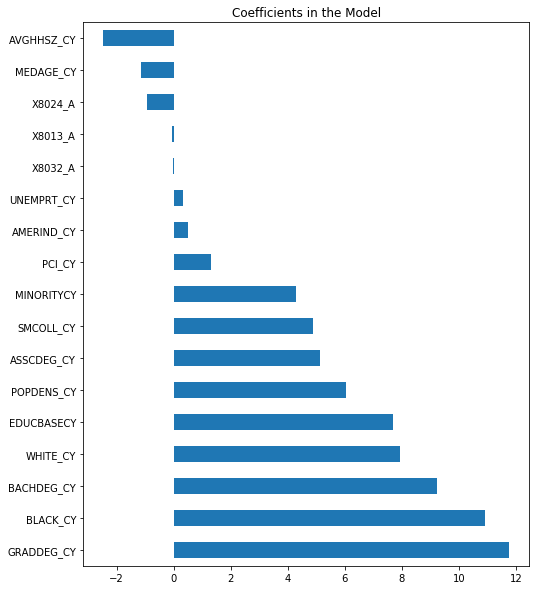

In [204]:
# Plot coefficients picked by model along with their importance
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Model")

### Regression with Selected Features

In the base model, we saw deviations from linearity, constant variance and independence assumptions. The model also seemed to overfit data with an R-squared value of 0.96. 

__For Linearity__ - If a model does not fit well, it does not mean that the regression is not useful. One problem could be that the relation between one or more predictors and the response is not linear.

__For Constant Variance and Independence__ - If normality or the constant variance do not hold, then we transform the response variable. A common transformation is the power transformation of y to the lambda, also called the Box-Cox transformation.

Here we will use the features selected by lasso model, standardize the predicting variables and transform the response to create a regression model on our data.

In [209]:
# Subset important predictors
train_x_lasso = test_LA.loc[:,imp_coef.index]
train_x_lasso.head()

GRADDEG_CY  BLACK_CY  BACHDEG_CY   WHITE_CY  EDUCBASECY  POPDENS_CY  \
7     124886.0  673651.0    180690.0   618922.0   1063143.0     11869.9   
8     193333.0  608225.0    337376.0  1335362.0   1709385.0      3046.4   
9     178686.0  176817.0    236121.0   931347.0    891271.0      1445.3   
14    150162.0  456390.0    211391.0   441833.0    699019.0      1972.8   
15    112071.0  675982.0    170261.0   932737.0   1200479.0      2887.9   

    ASSCDEG_CY  SMCOLL_CY  MINORITYCY   PCI_CY  AMERIND_CY  UNEMPRT_CY  \
7      60266.0   182434.0   1053483.0  24833.0      7744.0        10.8   
8     102480.0   332724.0   1890363.0  29987.0     17668.0         4.8   
9      69135.0   185739.0    354337.0  42427.0      3461.0         3.6   
14     42145.0   117843.0    631755.0  43174.0      2142.0         5.0   
15     98936.0   294896.0    891604.0  25903.0      7296.0         8.7   

    X8032_A  X8013_A  X8024_A  MEDAGE_CY  AVGHHSZ_CY  
7     96.20   450.21    38.77       34.9        2.47  
8    113.62   534.73    55.22       33.6        2.76  
9    154.37   737.81    73.89       41.9        2.45  
14   140.99   662.08    67.50       35.7        2.35  
15   114.89   537.30    48.09       38.8        2.53

In [210]:
from sklearn.preprocessing import StandardScaler
from scipy.stats import boxcox
from numpy import log
sc_data = StandardScaler()
train_x_std_lasso = sc_data.fit_transform(train_x_lasso)
# train_y_log = log(test_newcounty_df.iloc[:,2])
train_y_box = boxcox(test_LA.iloc[:,2], lmbda=0.5)

# train_y_box,fitted_lambda = stats.boxcox(train_y)
# train_y_box = pd.Series(stats.boxcox(train_y))

In [211]:
X_train_lasso = sm.add_constant(train_x_lasso)
sm_ols_lasso = sm.OLS(train_y_box, X_train_lasso).fit() 

C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [212]:
sm_ols_lasso.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     483.8
Date:                Sun, 04 Aug 2019   Prob (F-statistic):               0.00
Time:                        16:35:37   Log-Likelihood:                -2764.0
No. Observations:                1143   AIC:                             5564.
Df Residuals:                    1125   BIC:                             5655.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7425      2.048      3.292      0.001       2.723      10.762
GRADDEG_CY  4.773e-05   1.73e-05      2.761      0.006    1.38e-05    8.16e-05
BLACK_CY     3.41e-05   3.26e-06     10.470      0.000    2.77e-05    4.05e-05
BACHDEG_CY -2.681e-05   1.29e-05     -2.081      0.038   -5.21e-05   -1.53e-06
WHITE_CY    2.835e-05   3.59e-06      7.899      0.000    2.13e-05    3.54e-05
EDUCBASECY  1.722e-05   8.73e-06      1.973      0.049    9.84e-08    3.43e-05
POPDENS_CY     0.0001      0.000      0.756      0.450      -0.000       0.000
ASSCDEG_CY -9.491e-05   3.22e-05     -2.943      0.003      -0.000   -3.16e-05
SMCOLL_CY  -2.497e-05    1.7e-05     -1.472      0.141   -5.83e-05    8.32e-06
MINORITYCY -1.057e-05    2.2e-06     -4.802      0.000   -1.49e-05   -6.25e-06
PCI_CY         0.0005      4e-05     12.158      0.000       0.000       0.001
AMERIND_CY  7.959e-05   1.96e-05      4.058      0.000    4.11e-05       0.000
UNEMPRT_CY    -0.0223      0.050     -0.449      0.654      -0.120       0.075
X8032_A       -0.0733      0.072     -1.013      0.311      -0.215       0.069
X8013_A        0.0176      0.017      1.052      0.293      -0.015       0.051
X8024_A       -0.2711      0.046     -5.838      0.000      -0.362      -0.180
MEDAGE_CY     -0.1437      0.030     -4.770      0.000      -0.203      -0.085
AVGHHSZ_CY     0.8513      0.674      1.263      0.207      -0.471       2.174
==============================================================================
Omnibus:                      189.429   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3118.347
Skew:                          -0.133   Prob(JB):                         0.00
Kurtosis:                      11.087   Cond. No.                     9.42e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.42e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The expected change in sqrt(y=Provider Count) with respect to a one-unit increase in Graduate Degree holding all other variables constant is 1.78. This means that for one-unit increase in Graduate Degree, the sqrt(y=Provider Count) will increase by .000037 holding all other predictors fixed.

In [213]:
# Calculate RMSE of new model
pred_val = sm_ols_lasso.fittedvalues.copy()
new_rmse = rmse(train_y_box, pred_val)
new_rmse

2.7163666690172668

##### Verify Assumptions

In [162]:
# Assumptions
# pred_val = sm_ols_lasso.fittedvalues.copy()
# true_val = train_y_log
residual = sm_ols_lasso.resid

((array([-3.23592596, -2.9736227 , -2.82743255, ...,  2.82743255,
          2.9736227 ,  3.23592596]),
  array([-23.60097948, -12.46798723, -10.87861226, ...,  10.35146966,
          11.05871456,  16.41071076])),
 (2.549997923664846, 1.8720888403179958e-10, 0.9665717124690787))

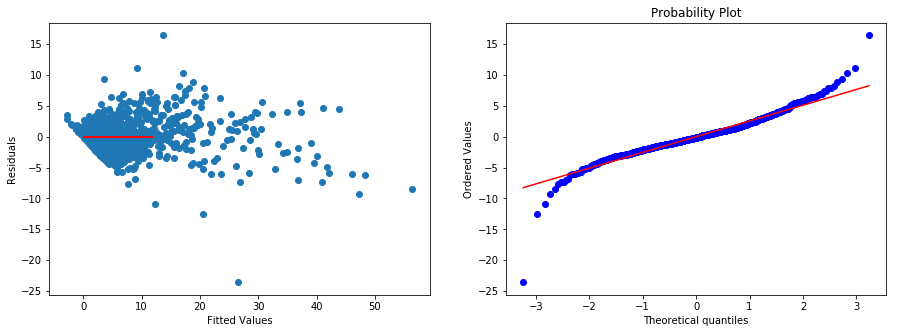

In [163]:
import scipy as sp
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))

# Residuals vs Fitted
ax1.scatter(pred_val, residual)
ax1.hlines(y=0, xmin=0, xmax=12, linewidth=2, color='r')
ax1.set_xlabel('Fitted Values')
ax1.set_ylabel('Residuals')

# QQ plot
sp.stats.probplot(residual, plot=ax2, fit=True)

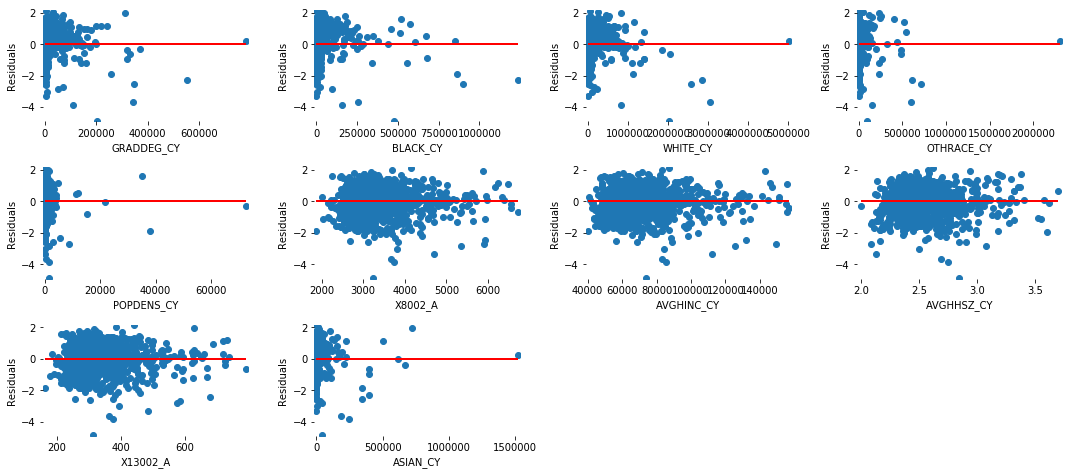

In [237]:
# Check Linearity - Plot predictors with residuals
states = train_x_lasso.columns
fig = plt.figure(figsize=(15, 15))

for sp in range(0,10):
    mini = min(test_newcounty_df.loc[:,states[sp]])
    maxi = max(test_newcounty_df.loc[:,states[sp]])
    ax = fig.add_subplot(7,4,sp+1)
    ax.scatter(test_newcounty_df.loc[:,states[sp]], residual)
    ax.hlines(y=0, xmin=mini, xmax=maxi, linewidth=2, color='r')
    ax.set_xlabel(states[sp])
    ax.set_ylabel('Residuals')
#     ax.set_ylim(0,provType.iloc[0,1])
    plt.xticks(rotation=0)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.margins(0.01, 0)
plt.tight_layout() # automatically adjusts layout to fit long labels
plt.show()

### Ensemble Models

In [175]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [176]:
ensemble = []
ensemble.append(('ScaledAB',Pipeline([('Scalar',StandardScaler()),('AB',AdaBoostRegressor())])))
ensemble.append(('ScaledGB',Pipeline([('Scalar',StandardScaler()),('AB',GradientBoostingRegressor())])))
ensemble.append(('ScaledRF',Pipeline([('Scalar',StandardScaler()),('AB',RandomForestRegressor(n_estimators=10))])))
ensemble.append(('ScaledET',Pipeline([('Scalar',StandardScaler()),('AB',ExtraTreesRegressor(n_estimators=10))])))

In [177]:
import math
results = []
names = []
for name, model in ensemble:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, train_x, train_y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, math.sqrt(abs(cv_results.mean())), cv_results.std())
    print(msg)

ScaledAB: 121.154282 (40507.045559)
ScaledGB: 118.122984 (40971.205377)
ScaledRF: 115.705741 (39125.193651)
ScaledET: 120.559273 (42396.388592)


### Run Random Forest

In [93]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_x, train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [94]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(train_x.columns, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: EDUCBASECY           Importance: 0.63
Variable: WHITE_CY             Importance: 0.1
Variable: MINORITYCY           Importance: 0.07
Variable: OTHRACE_CY           Importance: 0.05
Variable: HISPPOP_CY           Importance: 0.03
Variable: ASIAN_CY             Importance: 0.02
Variable: BLACK_CY             Importance: 0.02
Variable: POPDENS_CY           Importance: 0.02
Variable: AMERIND_CY           Importance: 0.01
Variable: AVGHHSZ_CY           Importance: 0.01
Variable: PCI_CY               Importance: 0.01
Variable: AVGHINC_CY           Importance: 0.0
Variable: MEDAGE_CY            Importance: 0.0
Variable: UNEMPRT_CY           Importance: 0.0
Variable: X8001_A              Importance: 0.0
Variable: X8002_A              Importance: 0.0
Variable: X8013_A              Importance: 0.0
Variable: X8018_A              Importance: 0.0
Variable: X8019_A              Importance: 0.0
Variable: X8024_A              Importance: 0.0
Variable: X8032_A              Importance: 0.0
Var

### Run LR

In [244]:
# Standard Scalar
from sklearn.preprocessing import StandardScaler
sc_data = StandardScaler()
train_x_std = sc_data.fit_transform(train_x)

In [245]:
import math
kfold = KFold(n_splits=10, random_state=7)
model = LinearRegression()
results = cross_val_score(model, train_x_std, train_y, cv=kfold, scoring='neg_mean_squared_error')
print("Negative MSE: %.3f (%.3f)" % (results.mean(), results.std()))
print("RMSE: %.3f" % (math.sqrt(abs(results.mean()))))

Negative MSE: -4831.535 (13736.022)
RMSE: 69.509


In [243]:
model.get_params

<bound method BaseEstimator.get_params of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)>

In [242]:
coef = pd.Series(model.coef_, index = train_x.columns)
imp_coef = pd.concat([coef.sort_values(ascending=False)])
imp_coef

AttributeError: 'LinearRegression' object has no attribute 'coef_'

### Run Ridge

In [186]:
# Standard Scalar
from sklearn.preprocessing import StandardScaler
sc_data = StandardScaler()
train_x_std = sc_data.fit_transform(train_x)

In [187]:
from sklearn.linear_model import Ridge
ridge_model=Ridge()
ridge_model.fit(train_x_std,train_y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [188]:
coef = pd.Series(ridge_model.coef_, index = train_x.columns)
print("Lasso model picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso model picked 27 variables and eliminated the other 0 variables


In [190]:
imp_coef = pd.concat([coef.sort_values(ascending=False)])
imp_coef

GRADDEG_CY    77.239684
EDUCBASECY    68.738600
X8019_A       51.208393
PCI_CY        36.519822
X8018_A       29.029839
WHITE_CY      19.454203
X13002_A      13.596778
BLACK_CY      12.973936
OTHRACE_CY    12.243136
BACHDEG_CY     9.790354
AVGHHSZ_CY     5.667606
POPDENS_CY     4.967631
MINORITYCY     1.426801
UNEMPRT_CY     0.561316
X8032_A        0.018115
AMERIND_CY    -1.456211
SMCOLL_CY     -2.470270
X8001_A       -3.608464
MEDAGE_CY     -4.718549
HISPPOP_CY    -6.838733
X8024_A       -6.981113
X8013_A      -17.628532
ASIAN_CY     -19.852558
X8002_A      -19.854157
X13004_A     -42.277273
ASSCDEG_CY   -49.270634
AVGHINC_CY   -52.111574
dtype: float64

Text(0.5, 1.0, 'Coefficients in the Lasso Model')

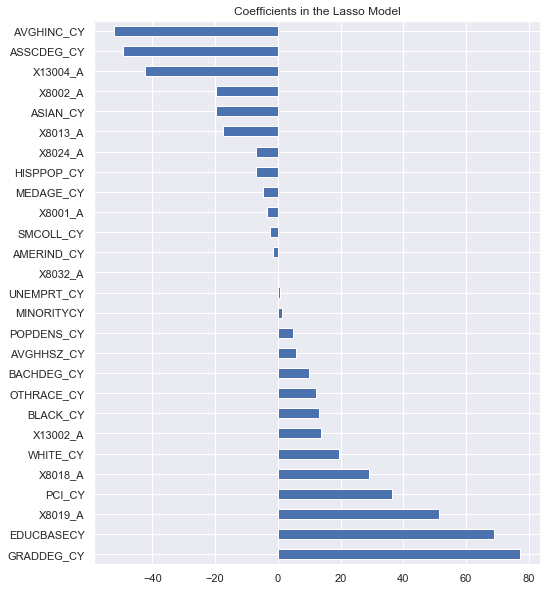

In [191]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

From the analysis above, we can see that factors that are predictive of higher provider count are:
- GRADDEG_CY (2018 Education: Graduate/Professional Degree (Esri))
- HINC15_CY (Household Income $15000 - $24999 (Esri))
- POPDENS_CY (2018 Population Density (Pop per Square Mile) (Esri))
- UNEMP_CY (2018 Unemployed Population Age 16+ (Esri))
- NHSPBLK_CY (2018 Black/African American Non-Hispanic Population (Esri))
- AGGINC_CY (2018 Aggregate Income (Esri))
- AGGHINC_CY (2018 Aggregate Household Income (Esri))
- HINC0_CY (Household Income less than $15000 (Esri))
- GQPOP_CY (2018 Group Quarters Population (Esri))
- HISPOTH_CY (2018 Hispanic Other Race Population (Esri))

Factors that negatively influence provider count are:
- HISPBLK_CY (2018 Hispanic Black/African American Population (Esri))
- NHSPOTH_CY (2018 Other Race Non-Hispanic Population (Esri))
- PIFBASE_CY (2018 Pacific Islander Female Population by Age Base (Esri))

### Run Elastic Net

ElasticNet combines the properties of both Ridge and LASSO regression.  It seeks to minimize the complexity of the model (magnitude  and  number  of  regression  coefficients)  by  penalizing  the  model  using  both  the L2-norm (sum squared coefficient values) and the L1-norm (sum absolute coefficient values).

In [192]:
# Standard Scalar
from sklearn.preprocessing import StandardScaler
from scipy import stats
sc_data = StandardScaler()
train_x_std = sc_data.fit_transform(train_x)

In [193]:
from sklearn.linear_model import Lasso
elastic_model=ElasticNet()
elastic_model.fit(train_x_std,train_y)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [194]:
coef = pd.Series(elastic_model.coef_, index = train_x.columns)
print("ElasticNet model picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

ElasticNet model picked 20 variables and eliminated the other 7 variables


In [199]:
coef

ASIAN_CY       3.947739
AMERIND_CY     1.408611
AVGHHSZ_CY    -4.172749
AVGHINC_CY     0.453336
BLACK_CY      15.468153
EDUCBASECY    11.774654
HISPPOP_CY     4.213778
MEDAGE_CY     -1.883922
MINORITYCY     7.671412
OTHRACE_CY     4.555564
PCI_CY         3.504828
POPDENS_CY     9.963559
UNEMPRT_CY     1.127128
WHITE_CY      12.620984
SMCOLL_CY      9.748853
ASSCDEG_CY     7.980145
BACHDEG_CY    14.850023
GRADDEG_CY    18.869037
X8001_A        0.000000
X8002_A        0.000000
X8013_A       -0.000000
X8018_A       -0.000000
X8019_A        0.000000
X8024_A       -0.620345
X8032_A       -0.000000
X13002_A      -0.000000
X13004_A       0.058779
dtype: float64

In [197]:
imp_coef = pd.concat([coef.sort_values(ascending=False).head(17),
                     coef.sort_values(ascending=False).tail(3)])
imp_coef

GRADDEG_CY    18.869037
BLACK_CY      15.468153
BACHDEG_CY    14.850023
WHITE_CY      12.620984
EDUCBASECY    11.774654
POPDENS_CY     9.963559
SMCOLL_CY      9.748853
ASSCDEG_CY     7.980145
MINORITYCY     7.671412
OTHRACE_CY     4.555564
HISPPOP_CY     4.213778
ASIAN_CY       3.947739
PCI_CY         3.504828
AMERIND_CY     1.408611
UNEMPRT_CY     1.127128
AVGHINC_CY     0.453336
X13004_A       0.058779
X8024_A       -0.620345
MEDAGE_CY     -1.883922
AVGHHSZ_CY    -4.172749
dtype: float64

Text(0.5, 1.0, 'Coefficients in the Lasso Model')

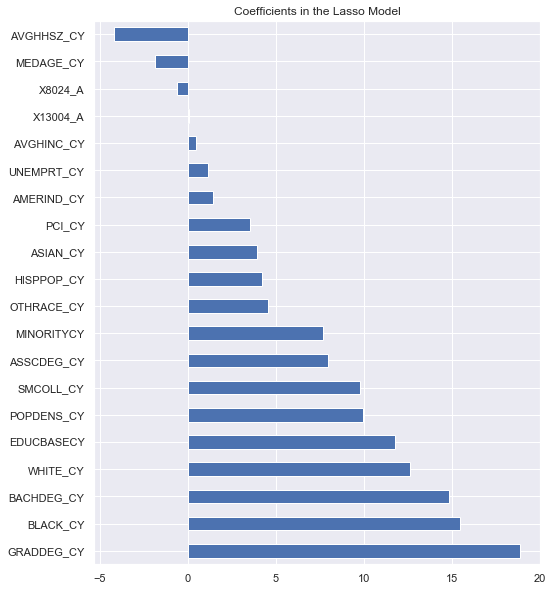

In [198]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

### Add new columns - Provider Density

In [63]:
add_columns_df = test_newcounty_df.copy()

In [64]:
add_columns_df['WhitePop_Density'] = add_columns_df['WHITE_CY']/add_columns_df['TOTPOP_CY']
add_columns_df['BlackPop_Density'] = add_columns_df['BLACK_CY']/add_columns_df['TOTPOP_CY']
add_columns_df['WhitePop_Density'] = add_columns_df['WHITE_CY']/add_columns_df['TOTPOP_CY']
add_columns_df['AmeIndPop_Density'] = add_columns_df['AMERIND_CY']/add_columns_df['TOTPOP_CY']
add_columns_df['AsianPop_Density'] = add_columns_df['ASIAN_CY']/add_columns_df['TOTPOP_CY']
add_columns_df['PacificPop_Density'] = add_columns_df['PACIFIC_CY']/add_columns_df['TOTPOP_CY']
add_columns_df['OtherPop_Density'] = add_columns_df['OTHRACE_CY']/add_columns_df['TOTPOP_CY']
add_columns_df['HispanicPop_Density'] = add_columns_df['HISPPOP_CY']/add_columns_df['TOTPOP_CY']
add_columns_df['Provider_Density'] = add_columns_df['Provider_Count']/add_columns_df['TOTPOP_CY']

In [65]:
# Check Datatypes of different columns
g = add_columns_df.columns.to_series().groupby(add_columns_df.dtypes).groups
g

{dtype('int64'): Index(['Provider_Count'], dtype='object'),
 dtype('float64'): Index(['AAGEBASECY', 'AGGDI_CY', 'AGGHINC_CY', 'AGGINC_CY', 'AGGNW_CY',
        'AIFBASE_CY', 'AIMBASE_CY', 'AMERIND_CY', 'AREA', 'ASIAN_CY',
        ...
        'WHTMBASECY', 'WIDOWED_CY', 'WhitePop_Density', 'BlackPop_Density',
        'AmeIndPop_Density', 'AsianPop_Density', 'PacificPop_Density',
        'OtherPop_Density', 'HispanicPop_Density', 'Provider_Density'],
       dtype='object', length=179),
 dtype('O'): Index(['RegionAbbr', 'Subregion'], dtype='object')}

In [66]:
add_columns_df.head()

RegionAbbr           Subregion  Provider_Count  AAGEBASECY      AGGDI_CY  \
0         CA  Los Angeles County            2094   1517296.0  2.359152e+11   
1         IL         Cook County            1586    395712.0  1.284204e+11   
2         NY     New York County            1136    212844.0  6.672674e+10   
3         TX       Harris County            1124    341640.0  1.132993e+11   
4         AZ     Maricopa County             844    184150.0  1.043304e+11   

     AGGHINC_CY     AGGINC_CY      AGGNW_CY  AIFBASE_CY  AIMBASE_CY  \
0  3.196410e+11  3.247511e+11  2.224411e+12     35957.0     37602.0   
1  1.771502e+11  1.797564e+11  1.326345e+12     10418.0     10695.0   
2  1.091191e+11  1.109282e+11  4.008776e+11      4542.0      4214.0   
3  1.470200e+11  1.487312e+11  1.000460e+12     14364.0     15637.0   
4  1.333034e+11  1.346919e+11  1.310493e+12     51929.0     46655.0   

   AMERIND_CY         AREA   ASIAN_CY  ASNFBASECY  ASNMBASECY  ASSCDEG_CY  \
0     73559.0  4085.699440  1517296.0    805865.0    711431.0    469649.0   
1     21113.0   953.145682   395712.0    206041.0    189671.0    237028.0   
2      8756.0    22.950686   212844.0    119067.0     93777.0     48360.0   
3     30001.0  1748.811066   341640.0    173439.0    168201.0    193511.0   
4     98584.0  9224.040205   184150.0     97892.0     86258.0    241714.0   

   AVGDI_CY  AVGFMSZ_CY  AVGHHSZ_CY  AVGHINC_CY  AVGNW_CY  AVGVAL_CY  \
0   70013.0        3.63        3.00     94861.0  660145.0   710686.0   
1   63978.0        3.36        2.58     88254.0  660769.0   335311.0   
2   83690.0        3.02        2.00    136860.0  502791.0  1307852.0   
3   68781.0        3.49        2.85     89252.0  607353.0   251600.0   
4   64964.0        3.32        2.69     83005.0  816017.0   303705.0   

   BABYBOOMCY  BACHDEG_CY  BAGEBASECY   BLACK_CY  BLKFBASECY  BLKMBASECY  \
0   1987624.0   1445895.0    850350.0   850350.0    450243.0    400107.0   
1   1076607.0    830433.0   1233716.0  1233716.0    674544.0    559172.0   
2    345825.0    406878.0    247085.0   247085.0    133471.0    113614.0   
3    848003.0    605813.0    901459.0   901459.0    478023.0    423436.0   
4    872897.0    597653.0    253576.0   253576.0    124641.0    128935.0   

   CIVLBFR_CY  EDUCBASECY     EMP_CY   FAMHH_CY  FAMPOP_CY   FEM0_CY  \
0   5232399.0   6899087.0  4995839.0  2281483.0  8292844.0  312953.0   
1   2791109.0   3607345.0  2599303.0  1216270.0  4087547.0  158205.0   
2    996167.0   1251653.0   956908.0   314952.0   951099.0   35672.0   
3   2335018.0   3029538.0  2196764.0  1124808.0  3920902.0  176809.0   
4   2181523.0   2891837.0  2065771.0  1053223.0  3492063.0  149041.0   

   FEM15_CY  FEM18UP_CY  FEM20_CY  FEM21UP_CY  FEM25_CY  FEM30_CY  FEM35_CY  \
0  331081.0   4077284.0  384255.0   3858162.0  421330.0  392960.0  359612.0   
1  161652.0   2144742.0  185272.0   2040962.0  217698.0  207243.0  188312.0   
2   40691.0    760316.0   71461.0    725473.0   95217.0   86134.0   68890.0   
3  152219.0   1773341.0  169057.0   1680385.0  196592.0  183051.0  171499.0   
4  138470.0   1694648.0  151115.0   1606050.0  165009.0  153091.0  145864.0   

   FEM40_CY  FEM45_CY  FEM50_CY  FEM55_CY   FEM5_CY  FEM60_CY  FEM65_CY  \
0  328513.0  335961.0  332084.0  327978.0  310887.0  291733.0  246493.0   
1  166222.0  164629.0  166570.0  174115.0  159117.0  162326.0  139839.0   
2   53980.0   50374.0   50312.0   53400.0   32553.0   52503.0   49261.0   
3  154056.0  148493.0  141554.0  141858.0  172608.0  125458.0  102481.0   
4  134160.0  133211.0  130665.0  133428.0  147853.0  125740.0  117630.0   

   FEM70_CY  FEM75_CY  FEM80_CY  FEM85_CY  FEMALES_CY    GED_CY  GENALPHACY  \
0  183490.0  131256.0   90178.0  110499.0   5208957.0  120351.0    255399.0   
1  104629.0   75554.0   54048.0   70522.0   2717277.0   95959.0    129327.0   
2   38526.0   27262.0   18025.0   22645.0    878322.0   26610.0     30855.0   
3   70111.0   46215.0   29690.0   32228.0   2380573.0   98795.0    145111.0   

#### Define Response and Predictor Variables

In [79]:
# Create prdictor and response variables
train_x = add_columns_df.iloc[:,3:-1]
train_y = add_columns_df.iloc[:,-1]
train_x.head()

AAGEBASECY      AGGDI_CY    AGGHINC_CY     AGGINC_CY      AGGNW_CY  \
0   1517296.0  2.359152e+11  3.196410e+11  3.247511e+11  2.224411e+12   
1    395712.0  1.284204e+11  1.771502e+11  1.797564e+11  1.326345e+12   
2    212844.0  6.672674e+10  1.091191e+11  1.109282e+11  4.008776e+11   
3    341640.0  1.132993e+11  1.470200e+11  1.487312e+11  1.000460e+12   
4    184150.0  1.043304e+11  1.333034e+11  1.346919e+11  1.310493e+12   

   AIFBASE_CY  AIMBASE_CY  AMERIND_CY         AREA   ASIAN_CY  ASNFBASECY  \
0     35957.0     37602.0     73559.0  4085.699440  1517296.0    805865.0   
1     10418.0     10695.0     21113.0   953.145682   395712.0    206041.0   
2      4542.0      4214.0      8756.0    22.950686   212844.0    119067.0   
3     14364.0     15637.0     30001.0  1748.811066   341640.0    173439.0   
4     51929.0     46655.0     98584.0  9224.040205   184150.0     97892.0   

   ASNMBASECY  ASSCDEG_CY  AVGDI_CY  AVGFMSZ_CY  AVGHHSZ_CY  AVGHINC_CY  \
0    711431.0    469649.0   70013.0        3.63        3.00     94861.0   
1    189671.0    237028.0   63978.0        3.36        2.58     88254.0   
2     93777.0     48360.0   83690.0        3.02        2.00    136860.0   
3    168201.0    193511.0   68781.0        3.49        2.85     89252.0   
4     86258.0    241714.0   64964.0        3.32        2.69     83005.0   

   AVGNW_CY  AVGVAL_CY  BABYBOOMCY  BACHDEG_CY  BAGEBASECY   BLACK_CY  \
0  660145.0   710686.0   1987624.0   1445895.0    850350.0   850350.0   
1  660769.0   335311.0   1076607.0    830433.0   1233716.0  1233716.0   
2  502791.0  1307852.0    345825.0    406878.0    247085.0   247085.0   
3  607353.0   251600.0    848003.0    605813.0    901459.0   901459.0   
4  816017.0   303705.0    872897.0    597653.0    253576.0   253576.0   

   BLKFBASECY  BLKMBASECY  CIVLBFR_CY  EDUCBASECY     EMP_CY   FAMHH_CY  \
0    450243.0    400107.0   5232399.0   6899087.0  4995839.0  2281483.0   
1    674544.0    559172.0   2791109.0   3607345.0  2599303.0  1216270.0   
2    133471.0    113614.0    996167.0   1251653.0   956908.0   314952.0   
3    478023.0    423436.0   2335018.0   3029538.0  2196764.0  1124808.0   
4    124641.0    128935.0   2181523.0   2891837.0  2065771.0  1053223.0   

   FAMPOP_CY   FEM0_CY  FEM15_CY  FEM18UP_CY  FEM20_CY  FEM21UP_CY  FEM25_CY  \
0  8292844.0  312953.0  331081.0   4077284.0  384255.0   3858162.0  421330.0   
1  4087547.0  158205.0  161652.0   2144742.0  185272.0   2040962.0  217698.0   
2   951099.0   35672.0   40691.0    760316.0   71461.0    725473.0   95217.0   
3  3920902.0  176809.0  152219.0   1773341.0  169057.0   1680385.0  196592.0   
4  3492063.0  149041.0  138470.0   1694648.0  151115.0   1606050.0  165009.0   

   FEM30_CY  FEM35_CY  FEM40_CY  FEM45_CY  FEM50_CY  FEM55_CY   FEM5_CY  \
0  392960.0  359612.0  328513.0  335961.0  332084.0  327978.0  310887.0   
1  207243.0  188312.0  166222.0  164629.0  166570.0  174115.0  159117.0   
2   86134.0   68890.0   53980.0   50374.0   50312.0   53400.0   32553.0   
3  183051.0  171499.0  154056.0  148493.0  141554.0  141858.0  172608.0   
4  153091.0  145864.0  134160.0  133211.0  130665.0  133428.0  147853.0   

   FEM60_CY  FEM65_CY  FEM70_CY  FEM75_CY  FEM80_CY  FEM85_CY  FEMALES_CY  \
0  291733.0  246493.0  183490.0  131256.0   90178.0  110499.0   5208957.0   
1  162326.0  139839.0  104629.0   75554.0   54048.0   70522.0   2717277.0   
2   52503.0   49261.0   38526.0   27262.0   18025.0   22645.0    878322.0   
3  125458.0  102481.0   70111.0   46215.0   29690.0   32228.0   2380573.0   
4  125740.0  117630.0   90474.0   62955.0   42348.0   51162.0   2217638.0   

     GED_CY  GENALPHACY  GENBASE_CY    GENX_CY    GENZ_CY  GQPOP_CY  \
0  120351.0    255399.0  10288937.0  2130083.0  2353920.0  176419.0   
1   95959.0    129327.0   5274129.0  1058747.0  1171989.0   90942.0   
2   26610.0     30855.0   1660472.0   339808.0   248875.0   66726.0   
3   98795.0    145111.0   4735852.0   961416.0  1219972.0   49092.0   
4   95969.

In [80]:
train_x.shape

(1157, 178)

In [81]:
train_y.head()

0    0.000204
1    0.000301
2    0.000684
3    0.000237
4    0.000192
Name: Provider_Density, dtype: float64

#### Identify Best Model

In [82]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring ='neg_mean_squared_error'

In [83]:
# Spot-Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [84]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, train_x, train_y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -0.000000 (0.000000)


C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.315384803230892e-06, tolerance: 1.47446680422909e-09
  positive)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.173040652991125e-06, tolerance: 1.1016880992866113e-09
  positive)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.995571428473911e-06, tolerance: 1.6678652527430239e-09
  positive)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis

LASSO: -0.000000 (0.000000)


C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.92841577466613e-06, tolerance: 1.6678652527430239e-09
  positive)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.953424049941943e-06, tolerance: 1.6735099171517605e-09
  positive)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.881782928385075e-06, tolerance: 1.6639492179839088e-09
  positive)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgi

EN: -0.000000 (0.000000)
KNN: -0.000000 (0.000000)
CART: -0.000000 (0.000000)
SVR: -0.000001 (0.000000)


C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  

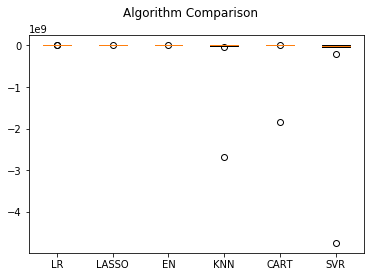

In [73]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [85]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO',Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN',ElasticNet())])))
# pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',KNeighborsRegressor())])))
# pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',DecisionTreeRegressor())])))
# pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR',SVR())])))

In [86]:
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, train_x, train_y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
#     print("RMSE: %.3f" % (math.sqrt(abs(cv_results.mean()))))

ScaledLR: -0.000000 (0.000000)
ScaledLASSO: -0.000000 (0.000000)
ScaledEN: -0.000000 (0.000000)


In [76]:
results

[array([-1.76991550e-20, -1.78346558e-21, -4.76548734e-22, -4.91459378e-22,
        -1.10718838e-21, -8.61251897e-22, -1.33795751e-21, -6.23579096e-22,
        -2.46384737e-22, -2.25784343e-22]),
 array([ -15347.825701  , -189235.12887074,  -73880.57488155,
         -24043.97653174,  -14866.25757397,  -12340.95647885,
         -39853.82095786,   -7863.94556402,   -5181.98778434,
          -6383.41712349]),
 array([-16733217.53135702,  -3442336.61974144,  -1152295.35352573,
          -332213.38812121,   -248278.21486488,   -187961.83823544,
          -609863.20757641,   -220717.33140251,   -279056.5239558 ,
          -620581.75701461])]

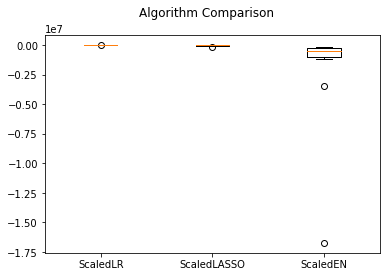

In [77]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Run Elastic Net

### Using Densities

In [204]:
# Create prdictor and response variables
train_x = test_newstate_df.iloc[:,:20]
train_y = test_newstate_df.iloc[:,-1]
train_x.head()

Provider_Count  AAGEBASECY      AGGDI_CY     AGGHINC_CY      AGGINC_CY  \
0          7353.0     5808539  984770070408  1341852609490  1363545956974   
1          5115.0     1428081  663797428676   846781778790   860166554925   
2          5005.0     1774868  494056143933   721252426439   733561461654   
3          4133.0      585936  487005072197   613723856820   624450149363   
4          3210.0      462360  315983343213   411902114464   418518490501   

         AGGNW_CY  AIFBASE_CY  AIMBASE_CY  AMERIND_CY           AREA  \
0  10953288740347      186300      188412      374712  158042.920912   
1   6544101733836       99642      101050      200692  264622.431161   
2   5780147040071       57206       55978      113184   48359.759399   
3   6548612367402       40665       42463       83128   56491.338012   
4   4125980999869       16036       16102       32138   45285.896438   

   ASIAN_CY  ASNFBASECY  ASNMBASECY  ASSCDEG_CY  AVGDI_CY  AVGFMSZ_CY  \
0   5808539     3057816     2750723     2056384     73844        3.50   
1   1428081      736438      691643     1352089     65007        3.36   
2   1774868      920657      854211     1234468     65662        3.27   
3    585936      316402      269534     1468305     59737        3.03   
4    462360      240313      222047      749637     61749        3.02   

   AVGHHSZ_CY  AVGHINC_CY  AVGNW_CY  AVGVAL_CY  
0        2.92      100620    821339     637422  
1        2.78       82927    640876     234140  
2        2.59       95857    768205     451725  
3        2.51       75281    803267     282862  
4        2.46       80493    806294     236846

In [422]:
# Standard Scalar
from sklearn.preprocessing import StandardScaler
sc_data = StandardScaler()
train_x_std = sc_data.fit_transform(train_x)
# Transform predictors
# from sklearn.preprocessing import PowerTransformer
# pt_data = PowerTransformer(method='box-cox')
# train_x_pt = pt_data.fit_transform(train_x)

# from scipy.stats import boxcox
# train_x_pt = boxcox(train_x)

In [423]:
# train_x_pt
train_x_std

array([[22.34795477, 18.05516815, 17.965054  , ..., 16.44519452,
        16.80905623, 18.62762542],
       [ 5.6822489 ,  9.64669999,  9.78298609, ...,  9.31051713,
         9.20807555, 11.08252361],
       [ 2.96499875,  4.82089499,  5.87652831, ...,  2.74204776,
         2.58167517,  2.70928177],
       ...,
       [-0.19646359, -0.37685625, -0.37043563, ..., -0.45093924,
        -0.44262892, -0.40747586],
       [-0.19531945, -0.36966815, -0.36346963, ..., -0.41996093,
        -0.41624254, -0.37088673],
       [-0.1937741 , -0.34420822, -0.33565532, ..., -0.3871941 ,
        -0.38137309, -0.34955075]])

#### Tune and Run

Regularization strength is regulated by alpha (similar to lambda in the equation). l1_ratio allows us to vary L1 vs L2 ratio. When the l1_ratio is set to 0 it is the same as ridge regression. When l1_ratio is set to 1 it is lasso.

In [428]:
# Tune hyperparameters for Elastic Net regression

from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
parametersGrid = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                  "l1_ratio": [.1, .5, .7, .9, .95, .99, 1]}

eNet = ElasticNet(random_state=3, max_iter=1000)
grid = GridSearchCV(eNet, parametersGrid, scoring='neg_mean_squared_error', cv=10)
grid.fit(train_x_std, train_y)
best_idx = grid.best_index_

C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41678.51954203416, tolerance: 45.19170444874274
  positive)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 161895.03584090917, tolerance: 1693.9877741779496
  positive)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 195211.52846741414, tolerance: 1701.5631427466149
  positive)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sk

C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 210115.57965929367, tolerance: 1680.5346720772945
  positive)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38991.51918803835, tolerance: 45.19170444874274
  positive)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 158531.91208379835, tolerance: 1693.9877741779496
  positive)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sk

C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 208113.67372772162, tolerance: 1683.3855794970991
  positive)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 209042.25466932406, tolerance: 1681.6908986460348
  positive)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 208928.88932987335, tolerance: 1680.5346720772945
  positive)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\

C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 218277.23055833086, tolerance: 1690.6666055125722
  positive)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 218825.74330476363, tolerance: 1687.4250113152802
  positive)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 203576.53017394606, tolerance: 1685.1196220502902
  positive)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\

C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 158938.75369887473, tolerance: 1693.9877741779496
  positive)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 191175.55660511294, tolerance: 1701.5631427466149
  positive)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 204883.72319995982, tolerance: 1695.9653531914894
  positive)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\

C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 206293.98533976538, tolerance: 1680.5346720772945
  positive)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46630.003611657834, tolerance: 45.19170444874274
  positive)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 230822.3979823824, tolerance: 1693.9877741779496
  positive)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sk

C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 186454.97338264264, tolerance: 1685.1196220502902
  positive)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 190694.33298899583, tolerance: 1683.3855794970991
  positive)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 190978.97933677194, tolerance: 1681.6908986460348
  positive)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\

C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 168073.2711810842, tolerance: 1690.6666055125722
  positive)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 167846.5435118922, tolerance: 1687.4250113152802
  positive)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 167389.28331844986, tolerance: 1685.1196220502902
  positive)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sk

C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 226510.15314598358, tolerance: 1695.9653531914894
  positive)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 222665.48881026456, tolerance: 1690.6666055125722
  positive)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 220752.91201737954, tolerance: 1687.4250113152802
  positive)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\

C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 59499.38913881907, tolerance: 1690.6666055125722
  positive)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 59579.80462290539, tolerance: 1687.4250113152802
  positive)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56942.63155557861, tolerance: 1685.1196220502902
  positive)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\skl

C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 393939.6402163658, tolerance: 1690.6666055125722
  positive)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 386639.0146009138, tolerance: 1687.4250113152802
  positive)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 334992.08431829535, tolerance: 1685.1196220502902
  positive)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sk

C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5460.929937050096, tolerance: 1685.1196220502902
  positive)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6913.898069663555, tolerance: 1683.3855794970991
  positive)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7034.813022656832, tolerance: 1681.6908986460348
  positive)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\skl

C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3085.3780808569863, tolerance: 1681.6908986460348
  positive)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3110.7923936082516, tolerance: 1680.5346720772945
  positive)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\mohi9282\AppData\Local\Continuum\anaco

In [429]:
print('Best Elastic Net parameters: ' + str(e_gs.best_params_))
print('Best EL cross-validation score: ' + str(e_gs.best_score_))

Best Elastic Net parameters: {'alpha': 0.1, 'l1_ratio': 1}
Best EL cross-validation score: -4144.818911275162


#### Run using parameters from tuning

In [431]:
elastic=ElasticNet(alpha=0.1,l1_ratio=1)
elastic.fit(train_x_std,train_y)

C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35780.44715979218, tolerance: 1704.0840955613576
  positive)


ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=1,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

#### Get Variable Coefficients

In [432]:
coef = pd.Series(elastic.coef_, index = train_x.columns)
print("Elastic Net picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Elastic Net picked 48 variables and eliminated the other 123 variables


In [433]:
coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_,train_x.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'AAGEBASECY': 0.0,
 'AGGDI_CY': 47.42115457157865,
 'AGGHINC_CY': 87.15589867412909,
 'AGGINC_CY': 3.412823220878211,
 'AGGNW_CY': 0.0,
 'AIFBASE_CY': 0.0,
 'AIMBASE_CY': 0.0,
 'AMERIND_CY': 0.0,
 'AREA': 0.0,
 'ASIAN_CY': 0.0,
 'ASNFBASECY': 0.0,
 'ASNMBASECY': 0.0,
 'ASSCDEG_CY': -2.2187711479879986,
 'AVGDI_CY': 0.0,
 'AVGFMSZ_CY': 1.8384091345091094,
 'AVGHHSZ_CY': 0.0,
 'AVGHINC_CY': 0.0,
 'AVGNW_CY': 1.1031864351227876,
 'AVGVAL_CY': 0.0,
 'BABYBOOMCY': -0.0,
 'BACHDEG_CY': 0.0,
 'BAGEBASECY': 0.0,
 'BLACK_CY': 0.0,
 'BLKFBASECY': 0.0,
 'BLKMBASECY': 0.0,
 'CIVLBFR_CY': -0.0,
 'EDUCBASECY': -0.0,
 'EMP_CY': -0.0,
 'FAMHH_CY': -0.0,
 'FAMPOP_CY': -0.0,
 'FEM0_CY': -13.003996879838455,
 'FEM15_CY': -0.0,
 'FEM18UP_CY': -0.0,
 'FEM20_CY': -6.4407237518483,
 'FEM21UP_CY': -0.0,
 'FEM25_CY': -0.0,
 'FEM30_CY': -0.0,
 'FEM35_CY': -0.0,
 'FEM40_CY': -0.0,
 'FEM45_CY': -0.0,
 'FEM50_CY': -0.0,
 'FEM55_CY': -0.0,
 'FEM5_CY': -0.0,
 'FEM60_CY': -0.0,
 'FEM65_CY': -0.0,
 'FEM70_CY': -0.092

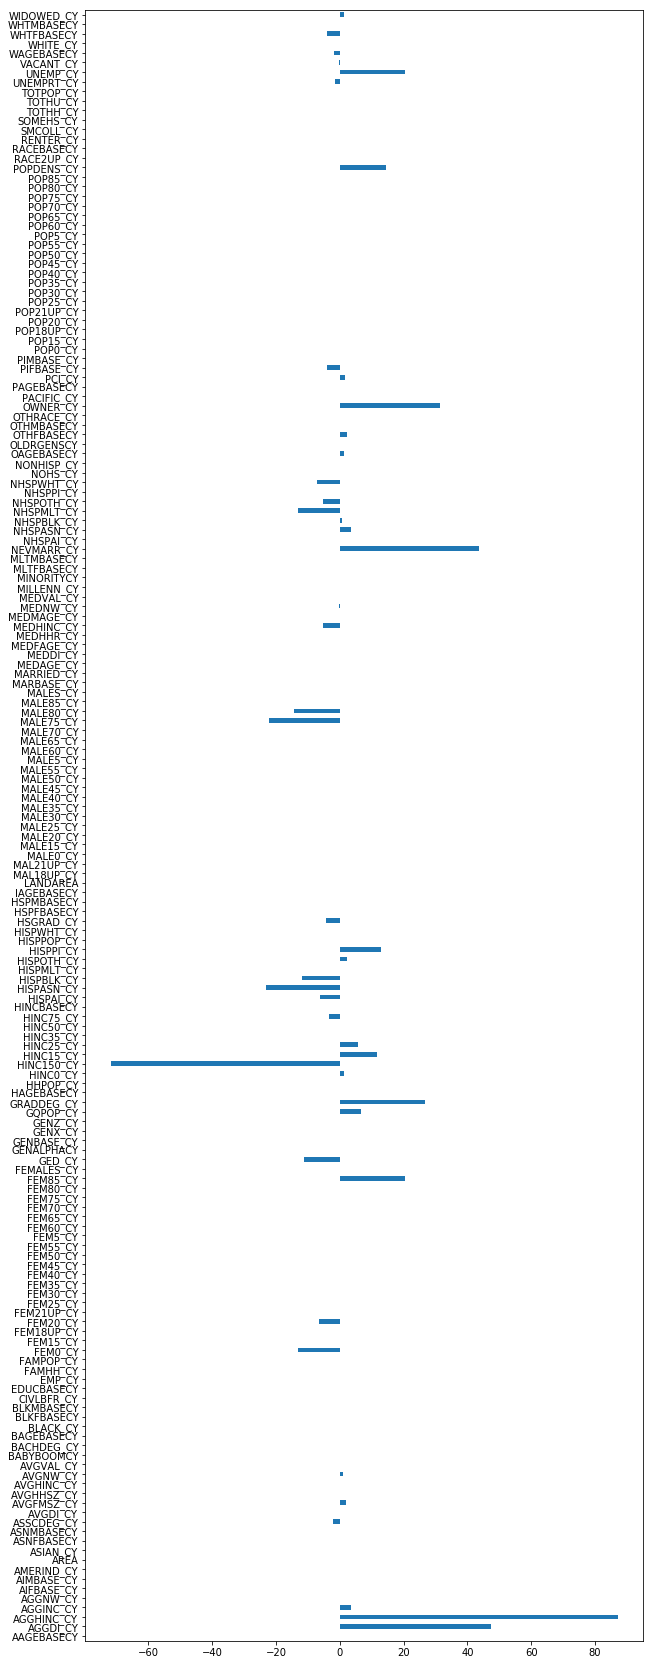

In [434]:
plt.figure(figsize=(10,30))
featureimp = pd.Series(elastic.coef_, index = train_x.columns)
featureimp.plot(kind='barh')
plt.show()

In [ ]:
# Using densities with box-cox
Best Elastic Net parameters: {'alpha': 0.1, 'l1_ratio': 0.1}
Best EL cross-validation score: -2.5487352278940628e-09

# Not using densities

### Not Using Densities

In [110]:
# Create copy of df to remove density columns
test_newstate_copy = test_newstate_df.iloc[:,:-8]
test_newstate_copy.head()

Provider_Count  AAGEBASECY      AGGDI_CY     AGGHINC_CY      AGGINC_CY  \
0          7353.0     5808539  984770070408  1341852609490  1363545956974   
1          5115.0     1428081  663797428676   846781778790   860166554925   
2          5005.0     1774868  494056143933   721252426439   733561461654   
3          4133.0      585936  487005072197   613723856820   624450149363   
4          3210.0      462360  315983343213   411902114464   418518490501   

         AGGNW_CY  AIFBASE_CY  AIMBASE_CY  AMERIND_CY           AREA  \
0  10953288740347      186300      188412      374712  158042.920912   
1   6544101733836       99642      101050      200692  264622.431161   
2   5780147040071       57206       55978      113184   48359.759399   
3   6548612367402       40665       42463       83128   56491.338012   
4   4125980999869       16036       16102       32138   45285.896438   

   ASIAN_CY  ASNFBASECY  ASNMBASECY  ASSCDEG_CY  AVGDI_CY  AVGFMSZ_CY  \
0   5808539     3057816     2750723     2056384     73844        3.50   
1   1428081      736438      691643     1352089     65007        3.36   
2   1774868      920657      854211     1234468     65662        3.27   
3    585936      316402      269534     1468305     59737        3.03   
4    462360      240313      222047      749637     61749        3.02   

   AVGHHSZ_CY  AVGHINC_CY  AVGNW_CY  AVGVAL_CY  BABYBOOMCY  BACHDEG_CY  \
0        2.92      100620    821339     637422     8055682     5552919   
1        2.78       82927    640876     234140     5610338     3595450   
2        2.59       95857    768205     451725     4524627     2844992   
3        2.51       75281    803267     282862     5125816     2763015   
4        2.46       80493    806294     236846     3167219     1763503   

   BAGEBASECY  BLACK_CY  BLKFBASECY  BLKMBASECY  CIVLBFR_CY  EDUCBASECY  \
0     2345048   2345048     1186331     1158717    19595308    26629106   
1     3554094   3554094     1837649     1716445    13994294    18710254   
2     3202872   3202872     1720637     1482235    10297331    13980509   
3     3423250   3423250     1775199     1648051     9939670    14984858   
4     1470953   1470953      765013      705940     6619516     9125523   

     EMP_CY  FAMHH_CY  FAMPOP_CY  FEM0_CY  FEM15_CY  FEM18UP_CY  FEM20_CY  \
0  18678853   9166028   32063051  1246195   1267704    15535129   1399534   
1  13323060   7102474   23868426  1012163    958641    11007087   1023650   
2   9750809   4711535   15422531   541010    622797     8316966    692667   
3   9428446   5273287   15994410   540535    575794     8672285    647413   
4   6217293   3282447    9921694   335276    404682     5362136    433612   

   FEM21UP_CY  FEM25_CY  FEM30_CY  FEM35_CY  FEM40_CY  FEM45_CY  FEM50_CY  \
0    14709444   1533458   1442776   1332317   1220853   1252603   1262625   
1    10392959   1088542   1028122    990111    912087    908014    888197   
2     7896904    736087    711718    665428    617325    653985    691792   
3     8288558    693040    652863    622949    602161    654907    696088   
4     5076349    410643    397480    389122    375532    411895    447624   

   FEM55_CY  FEM5_CY  FEM60_CY  FEM65_CY  FEM70_CY  FEM75_CY  FEM80_CY  \
0   1290328  1247274   1173091   1008278    746364    527232    362402   
1    906409  1016393    815633    699159    508500    349890    230272   
2    725143   555213    671105    583941    447188    321376    227864   
3    756439   556332    740359    711079    574407    426317    297361   
4    487329   355242    461925    408531    312098    231110    173218   

   FEM85_CY  FEMALES_CY  GED_CY  GENALPHACY  GENBASE_CY  GENX_CY  GENZ_CY  \
0    447803    20024285  621048     1008060    39806791  8011720  9289070   
1    255883    14596063  796406      820030    28954616  5795902  7332348   
2    297383    10347030  556396      439969    20070143  4071725  4262278   
3    348670    10667264  630616      434241    20875686  4066365  4142104   
4    235227     

In [170]:
# 
train_x_new = test_newstate_copy.iloc[:,1:]
# train_y_new = np.log(test_newstate_df.iloc[:,0].values+1)
train_y_new = test_newstate_df.iloc[:,0]

In [171]:
train_x_new.head()

AAGEBASECY      AGGDI_CY     AGGHINC_CY      AGGINC_CY        AGGNW_CY  \
0     5808539  984770070408  1341852609490  1363545956974  10953288740347   
1     1428081  663797428676   846781778790   860166554925   6544101733836   
2     1774868  494056143933   721252426439   733561461654   5780147040071   
3      585936  487005072197   613723856820   624450149363   6548612367402   
4      462360  315983343213   411902114464   418518490501   4125980999869   

   AIFBASE_CY  AIMBASE_CY  AMERIND_CY           AREA  ASIAN_CY  ASNFBASECY  \
0      186300      188412      374712  158042.920912   5808539     3057816   
1       99642      101050      200692  264622.431161   1428081      736438   
2       57206       55978      113184   48359.759399   1774868      920657   
3       40665       42463       83128   56491.338012    585936      316402   
4       16036       16102       32138   45285.896438    462360      240313   

   ASNMBASECY  ASSCDEG_CY  AVGDI_CY  AVGFMSZ_CY  AVGHHSZ_CY  AVGHINC_CY  \
0     2750723     2056384     73844        3.50        2.92      100620   
1      691643     1352089     65007        3.36        2.78       82927   
2      854211     1234468     65662        3.27        2.59       95857   
3      269534     1468305     59737        3.03        2.51       75281   
4      222047      749637     61749        3.02        2.46       80493   

   AVGNW_CY  AVGVAL_CY  BABYBOOMCY  BACHDEG_CY  BAGEBASECY  BLACK_CY  \
0    821339     637422     8055682     5552919     2345048   2345048   
1    640876     234140     5610338     3595450     3554094   3554094   
2    768205     451725     4524627     2844992     3202872   3202872   
3    803267     282862     5125816     2763015     3423250   3423250   
4    806294     236846     3167219     1763503     1470953   1470953   

   BLKFBASECY  BLKMBASECY  CIVLBFR_CY  EDUCBASECY    EMP_CY  FAMHH_CY  \
0     1186331     1158717    19595308    26629106  18678853   9166028   
1     1837649     1716445    13994294    18710254  13323060   7102474   
2     1720637     1482235    10297331    13980509   9750809   4711535   
3     1775199     1648051     9939670    14984858   9428446   5273287   
4      765013      705940     6619516     9125523   6217293   3282447   

   FAMPOP_CY  FEM0_CY  FEM15_CY  FEM18UP_CY  FEM20_CY  FEM21UP_CY  FEM25_CY  \
0   32063051  1246195   1267704    15535129   1399534    14709444   1533458   
1   23868426  1012163    958641    11007087   1023650    10392959   1088542   
2   15422531   541010    622797     8316966    692667     7896904    736087   
3   15994410   540535    575794     8672285    647413     8288558    693040   
4    9921694   335276    404682     5362136    433612     5076349    410643   

   FEM30_CY  FEM35_CY  FEM40_CY  FEM45_CY  FEM50_CY  FEM55_CY  FEM5_CY  \
0   1442776   1332317   1220853   1252603   1262625   1290328  1247274   
1   1028122    990111    912087    908014    888197    906409  1016393   
2    711718    665428    617325    653985    691792    725143   555213   
3    652863    622949    602161    654907    696088    756439   556332   
4    397480    389122    375532    411895    447624    487329   355242   

   FEM60_CY  FEM65_CY  FEM70_CY  FEM75_CY  FEM80_CY  FEM85_CY  FEMALES_CY  \
0   1173091   1008278    746364    527232    362402    447803    20024285   
1    815633    699159    508500    349890    230272    255883    14596063   
2    671105    583941    447188    321376    227864    297383    10347030   
3    740359    711079    574407    426317    297361    348670    10667264   
4    461925    408531    312098    231110    173218    235227     6642616   

   GED_CY  GENALPHACY  GENBASE_CY  GENX_CY  GENZ_CY  GQPOP_CY  GRADDEG_CY  \
0  621048     1008060    39806791  8011720  9289070    813593     3342632   
1  796406      820030    28954616  5795902  7332348    603396     1902087   
2  556396      439969    20070143  4071725  4262278    575494     2207562   
3  630616      434241    20875686  4066365  4142104    43

In [172]:
# # Transform predictors
# from sklearn.preprocessing import PowerTransformer
# pt_data = PowerTransformer(method='box-cox')
# train_x_pt = pt_data.fit_transform(train_x_new)

# Standard Scalar
from sklearn.preprocessing import StandardScaler
sc_data = StandardScaler()
train_x_std = sc_data.fit_transform(train_x_new)

In [173]:
parametersGrid = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                  "l1_ratio": [.1, .5, .7, .9, .95, .99, 1]}

eNet = ElasticNet(random_state=3, max_iter=1000)
grid = GridSearchCV(eNet, parametersGrid, scoring='neg_mean_squared_error', cv=10)
grid.fit(train_x_std, train_y_new)

C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20156.070166797137, tolerance: 2005.932311111111
  positive)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25580.82539699177, tolerance: 10274.911982608697
  positive)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36596.932696175005, tolerance: 10780.223436956523
  positive)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sk

C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27611.69697752278, tolerance: 10808.597982608695
  positive)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30505.919853909458, tolerance: 10738.399697826088
  positive)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28290.68652379256, tolerance: 10591.733297826087
  positive)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sk

C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26451.98568048466, tolerance: 10780.223436956523
  positive)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26402.902625341812, tolerance: 10808.597982608695
  positive)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29499.46931559191, tolerance: 10738.399697826088
  positive)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sk

C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 53351.77292431351, tolerance: 10591.733297826087
  positive)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50457.35871366033, tolerance: 10432.601671739134
  positive)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60915.047082394005, tolerance: 10288.7006
  positive)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\li

C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35135.74182869109, tolerance: 10198.469210869565
  positive)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29543.79290940451, tolerance: 10062.415610869568
  positive)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7186.503147732061, tolerance: 2005.932311111111
  positive)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\skle

C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78487.06611649539, tolerance: 10274.911982608697
  positive)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 127881.2715122926, tolerance: 10780.223436956523
  positive)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 136975.0982249205, tolerance: 10808.597982608695
  positive)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\skl

C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41965.66307585173, tolerance: 10808.597982608695
  positive)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43414.320110149194, tolerance: 10738.399697826088
  positive)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42666.3000587859, tolerance: 10591.733297826087
  positive)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\skl

C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 369594.9601081552, tolerance: 10432.601671739134
  positive)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 342872.256096235, tolerance: 10288.7006
  positive)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 371066.05115251674, tolerance: 10198.469210869565
  positive)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\lin

C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 172440.25613825218, tolerance: 10062.415610869568
  positive)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31015.572063338215, tolerance: 2005.932311111111
  positive)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 68407.39152420318, tolerance: 10274.911982608697
  positive)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sk

C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 725458.5199430198, tolerance: 10591.733297826087
  positive)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 725983.6848212457, tolerance: 10432.601671739134
  positive)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 669429.8122573944, tolerance: 10288.7006
  positive)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\lin

C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 102839.21529204986, tolerance: 10808.597982608695
  positive)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 114155.05398217516, tolerance: 10738.399697826088
  positive)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 123541.44240985933, tolerance: 10591.733297826087
  positive)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\

C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40231.34455722105, tolerance: 10591.733297826087
  positive)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39890.750481483876, tolerance: 10432.601671739134
  positive)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41666.83008177369, tolerance: 10288.7006
  positive)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\li

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=3, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [174]:
print('Best Elastic Net parameters: ' + str(grid.best_params_))
print('Best EL cross-validation score: ' + str(grid.best_score_))

Best Elastic Net parameters: {'alpha': 1, 'l1_ratio': 0.5}
Best EL cross-validation score: -35089.43647606921


#### Run using parameters from tuning

In [166]:
elastic=ElasticNet(alpha=0.0001,l1_ratio=0.1)
elastic.fit(train_x_std,train_y)

ElasticNet(alpha=0.0001, copy_X=True, fit_intercept=True, l1_ratio=0.1,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

#### Get Variable Coefficients

In [168]:
coef = pd.Series(elastic.coef_, index = train_x.columns)
print("Elastic Net picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Elastic Net picked 6 variables and eliminated the other 173 variables


In [167]:
coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_,train_x.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'Provider_Count': 0.0,
 'AAGEBASECY': -0.0,
 'AGGDI_CY': 0.0,
 'AGGHINC_CY': 0.0,
 'AGGINC_CY': 0.0,
 'AGGNW_CY': 0.0,
 'AIFBASE_CY': -0.0,
 'AIMBASE_CY': -0.0,
 'AMERIND_CY': -0.0,
 'AREA': -0.0,
 'ASIAN_CY': -0.0,
 'ASNFBASECY': -0.0,
 'ASNMBASECY': -0.0,
 'ASSCDEG_CY': 0.0,
 'AVGDI_CY': 0.0,
 'AVGFMSZ_CY': -0.0,
 'AVGHHSZ_CY': -0.0,
 'AVGHINC_CY': 0.0,
 'AVGNW_CY': 0.0,
 'AVGVAL_CY': 1.3363209295111027e-06,
 'BABYBOOMCY': 0.0,
 'BACHDEG_CY': 0.0,
 'BAGEBASECY': 0.0,
 'BLACK_CY': 0.0,
 'BLKFBASECY': 0.0,
 'BLKMBASECY': 0.0,
 'CIVLBFR_CY': 0.0,
 'EDUCBASECY': 0.0,
 'EMP_CY': 0.0,
 'FAMHH_CY': 0.0,
 'FAMPOP_CY': 0.0,
 'FEM0_CY': -0.0,
 'FEM15_CY': 0.0,
 'FEM18UP_CY': 0.0,
 'FEM20_CY': 0.0,
 'FEM21UP_CY': 0.0,
 'FEM25_CY': 0.0,
 'FEM30_CY': 0.0,
 'FEM35_CY': 0.0,
 'FEM40_CY': 0.0,
 'FEM45_CY': 0.0,
 'FEM50_CY': 0.0,
 'FEM55_CY': 0.0,
 'FEM5_CY': 0.0,
 'FEM60_CY': 0.0,
 'FEM65_CY': 0.0,
 'FEM70_CY': 0.0,
 'FEM75_CY': 0.0,
 'FEM80_CY': 0.0,
 'FEM85_CY': 0.0,
 'FEMALES_CY': 0.0,
 'GED_CY'

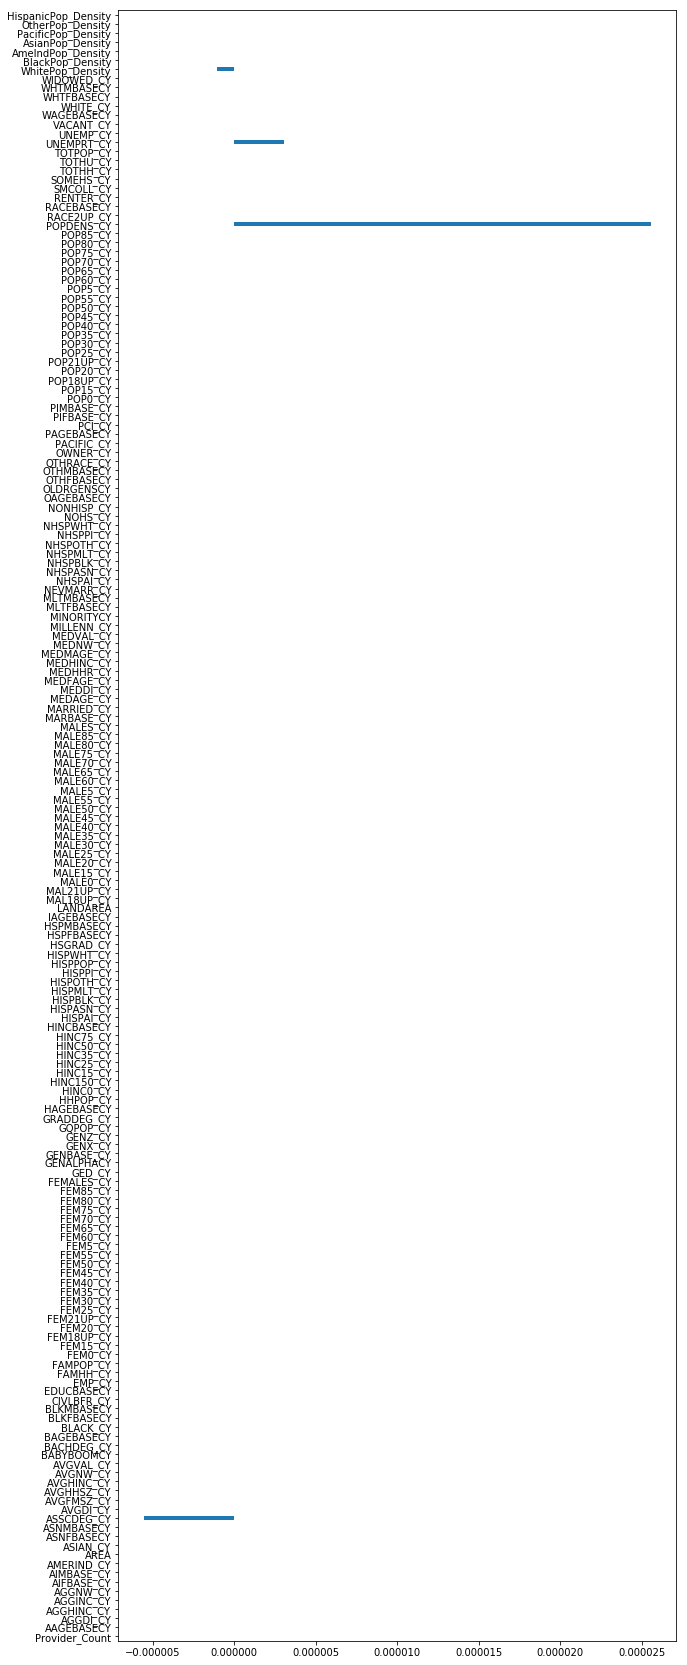

In [157]:
plt.figure(figsize=(10,30))
featureimp = pd.Series(elastic.coef_, index = train_x.columns)
featureimp.plot(kind='barh')
plt.show()